# Temperature Forecast Project using ML
## 1. Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



# 2. Import Library

In [1194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3.Import Dataset

In [1195]:
data=pd.read_csv("temp.csv")

In [1196]:
data

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

# 4.Basic Data Exploration

## 4.1 Shape of Dataset

In [1197]:
data.shape

(7752, 25)

**Observation**
- There are 7752 observation/rows and 25 columns in dataset.

In [1198]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [1199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


**Observation**
- There are 24 columns including target variables are float type data and 1 columns having object type.
- There are two target variable which is Next_Tmax and Next_Tmin

## 4.2 Statistical Summary

In [1200]:
data.describe().transpose()

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

**Observation**
- There are some missing value in dataset.
- There are some columns where minimum value is zero, we need to check on this.
- Except some columns maximum columns mean value and 50% value of data is almost near.

## 4.3 Checking Null Value

In [1201]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

**Observation**
- There are lot of null value in dataset.
- We have null value in our target variable.

In [1202]:
for i in data.columns:
    null_miss=data[i].isnull().sum()
    per=null_miss/data[i].shape[0]*100
    print(">",i," Missing: %d (%.2f%%)" % (null_miss,per))

> station  Missing: 2 (0.03%)
> Date  Missing: 2 (0.03%)
> Present_Tmax  Missing: 70 (0.90%)
> Present_Tmin  Missing: 70 (0.90%)
> LDAPS_RHmin  Missing: 75 (0.97%)
> LDAPS_RHmax  Missing: 75 (0.97%)
> LDAPS_Tmax_lapse  Missing: 75 (0.97%)
> LDAPS_Tmin_lapse  Missing: 75 (0.97%)
> LDAPS_WS  Missing: 75 (0.97%)
> LDAPS_LH  Missing: 75 (0.97%)
> LDAPS_CC1  Missing: 75 (0.97%)
> LDAPS_CC2  Missing: 75 (0.97%)
> LDAPS_CC3  Missing: 75 (0.97%)
> LDAPS_CC4  Missing: 75 (0.97%)
> LDAPS_PPT1  Missing: 75 (0.97%)
> LDAPS_PPT2  Missing: 75 (0.97%)
> LDAPS_PPT3  Missing: 75 (0.97%)
> LDAPS_PPT4  Missing: 75 (0.97%)
> lat  Missing: 0 (0.00%)
> lon  Missing: 0 (0.00%)
> DEM  Missing: 0 (0.00%)
> Slope  Missing: 0 (0.00%)
> Solar radiation  Missing: 0 (0.00%)
> Next_Tmax  Missing: 27 (0.35%)
> Next_Tmin  Missing: 27 (0.35%)


**As we can see missing data % is less than 1 % of dataset.

In [1203]:
def missing(data):
    miss_null=100*data.isnull().sum()/len(data)
    miss_null=miss_null[miss_null>0]
    return miss_null

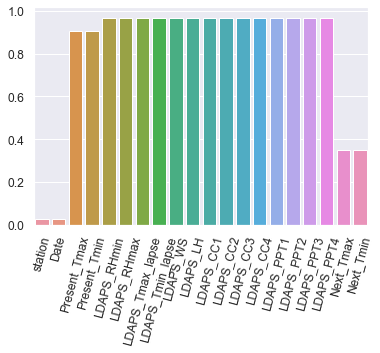

In [1204]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

# 5. Dealing with Missing Value

### Missing value in station columns

In [1205]:
data[data["station"].isnull()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [1206]:
data[data["station"].isnull()]["Date"]

7750    NaN
7751    NaN
Name: Date, dtype: object

**AS we can see that station columns and Date columns missing value are from same row index 7750 and 7751. So we will remove these 2 row from our dataset.**

In [1207]:
data=data.dropna(axis=0,subset=["station"])

In [1208]:
data[data["station"].isnull()]

Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]

**As we can see null value has been removed from dataset for both column station and Date.**

In [1209]:
data.reset_index(inplace=True,drop=True)

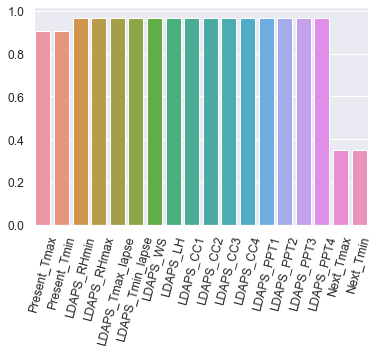

In [1210]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

### Dealing with Present_Tmax

In [1211]:
data[data["Present_Tmax"].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
225       1.0  09-07-2013           NaN           NaN    70.051193   
271      22.0  10-07-2013           NaN           NaN    72.196007   
300       1.0  12-07-2013           NaN           NaN    95.027298   
450       1.0  18-07-2013           NaN           NaN    60.891193   
464      15.0  18-07-2013           NaN           NaN    52.795406   
...       ...         ...           ...           ...          ...   
7579      5.0  24-08-2017           NaN           NaN    38.403931   
7596     22.0  24-08-2017           NaN           NaN    33.681381   
7605      6.0  25-08-2017           NaN           NaN    24.100304   
7629      5.0  26-08-2017           NaN           NaN    43.755058   
7707      8.0  29-08-2017           NaN           NaN    44.392651   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
225     99.668961         27.872808         22.907420  11.017837   44.002020   
271     95.168205         28.097980         24.510159   8.374849   38.782242   
300     99.209839         24.078120         21.866817   8.543768    9.371270   
450     94.747780         29.195536         23.236973  10.881031   79.349271   
464     83.902847         31.480089         25.607262   8.995135   26.022306   
...           ...               ...               ...        ...         ...   
7579    94.790405         29.929818         22.127591   5.817882  145.726477   
7596    91.842178         30.826400         22.978260   5.994230  103.179477   
7605    76.861076         28.999651         20.800666   6.511712   71.307767   
7629    83.340240         25.842338         18.532986   4.926595   97.230757   
7707    75.728195         22.223247         15.954970   4.764492   37.786237   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
225   ...    0.036680    0.000000    0.000000  37.6046  126.991  212.3350   
271   ...    0.007261    0.000000    0.000000  37.5102  127.086   21.9668   
300   ...    5.055660    1.347418    0.980052  37.6046  126.991  212.3350   
450   ...    0.000000    0.000000    0.057358  37.6046  126.991  212.3350   
464   ...    0.000000    0.000000    0.008702  37.5507  126.937   30.0464   
...   ...         ...         ...         ...      ...      ...       ...   
7579  ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
7596  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7605  ...    0.000000    0.000000    0.000000  37.5102  127.042   54.6384   
7629  ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
7707  ...    0.000000    0.000000    0.000000  37.4697  126.910   52.5180   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
225   2.7850      5925.883789       23.4       22.0  
271   0.1332      5772.487305       26.1       24.1  
300   2.7850      5893.265625       23.2       20.5  
450   2.7850      5812.293457       27.6       21.8  
464   0.8552      5681.875000       30.7       23.4  
...      ...              ...        ...        ...  
7579  0.5055      4677.062012       31.3       21.5  
7596  0.1332      4672.853027       31.6       22.4  
7605  0.1457      4653.651855       29.5       21.5  
7629  0.5055      4602.118164       26.1       17.9  
7707  1.5629      4478.937012       23.1       16.3  

[70 rows x 25 columns]

**As we can see there are 70 rows having missing value so we will fill this missing data with mean value of the columns.**

In [1212]:
mean=data["Present_Tmax"].mean()

In [1213]:
data["Present_Tmax"]=data["Present_Tmax"].fillna(mean)

In [1214]:
data[data["Present_Tmax"].isnull()]

Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]

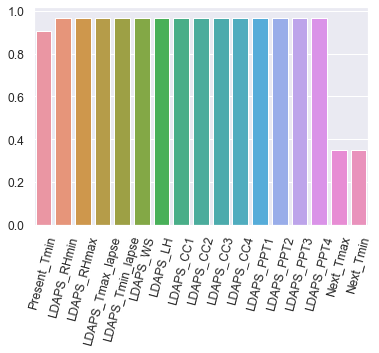

In [1215]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

### Dealing with Present Tmin columns

In [1216]:
data[data["Present_Tmin"].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
225       1.0  09-07-2013     29.768464           NaN    70.051193   
271      22.0  10-07-2013     29.768464           NaN    72.196007   
300       1.0  12-07-2013     29.768464           NaN    95.027298   
450       1.0  18-07-2013     29.768464           NaN    60.891193   
464      15.0  18-07-2013     29.768464           NaN    52.795406   
...       ...         ...           ...           ...          ...   
7579      5.0  24-08-2017     29.768464           NaN    38.403931   
7596     22.0  24-08-2017     29.768464           NaN    33.681381   
7605      6.0  25-08-2017     29.768464           NaN    24.100304   
7629      5.0  26-08-2017     29.768464           NaN    43.755058   
7707      8.0  29-08-2017     29.768464           NaN    44.392651   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
225     99.668961         27.872808         22.907420  11.017837   44.002020   
271     95.168205         28.097980         24.510159   8.374849   38.782242   
300     99.209839         24.078120         21.866817   8.543768    9.371270   
450     94.747780         29.195536         23.236973  10.881031   79.349271   
464     83.902847         31.480089         25.607262   8.995135   26.022306   
...           ...               ...               ...        ...         ...   
7579    94.790405         29.929818         22.127591   5.817882  145.726477   
7596    91.842178         30.826400         22.978260   5.994230  103.179477   
7605    76.861076         28.999651         20.800666   6.511712   71.307767   
7629    83.340240         25.842338         18.532986   4.926595   97.230757   
7707    75.728195         22.223247         15.954970   4.764492   37.786237   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
225   ...    0.036680    0.000000    0.000000  37.6046  126.991  212.3350   
271   ...    0.007261    0.000000    0.000000  37.5102  127.086   21.9668   
300   ...    5.055660    1.347418    0.980052  37.6046  126.991  212.3350   
450   ...    0.000000    0.000000    0.057358  37.6046  126.991  212.3350   
464   ...    0.000000    0.000000    0.008702  37.5507  126.937   30.0464   
...   ...         ...         ...         ...      ...      ...       ...   
7579  ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
7596  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7605  ...    0.000000    0.000000    0.000000  37.5102  127.042   54.6384   
7629  ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
7707  ...    0.000000    0.000000    0.000000  37.4697  126.910   52.5180   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
225   2.7850      5925.883789       23.4       22.0  
271   0.1332      5772.487305       26.1       24.1  
300   2.7850      5893.265625       23.2       20.5  
450   2.7850      5812.293457       27.6       21.8  
464   0.8552      5681.875000       30.7       23.4  
...      ...              ...        ...        ...  
7579  0.5055      4677.062012       31.3       21.5  
7596  0.1332      4672.853027       31.6       22.4  
7605  0.1457      4653.651855       29.5       21.5  
7629  0.5055      4602.118164       26.1       17.9  
7707  1.5629      4478.937012       23.1       16.3  

[70 rows x 25 columns]

 **Here also there are rows having null values so we will fill these with mean value of the columns.**

In [1217]:
mean=data["Present_Tmin"].mean()

In [1218]:
data["Present_Tmin"]=data["Present_Tmin"].fillna(mean)

In [1219]:
data[data["Present_Tmin"].isnull()]

Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]

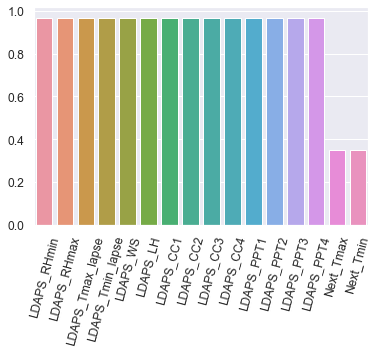

In [1220]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

### Dealing with LDAPS RHmin

In [1221]:
data[data["LDAPS_RHmin"].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  10-08-2013          27.1          24.5          NaN   
1026      2.0  10-08-2013          29.7          25.4          NaN   
1027      3.0  10-08-2013          29.1          25.9          NaN   
1028      4.0  10-08-2013          30.8          27.3          NaN   
1029      5.0  10-08-2013          29.7          25.7          NaN   
...       ...         ...           ...           ...          ...   
5945     21.0  20-08-2016          34.1          27.9          NaN   
5946     22.0  20-08-2016          34.3          27.7          NaN   
5947     23.0  20-08-2016          34.6          28.7          NaN   
5948     24.0  20-08-2016          35.0          28.6          NaN   
5949     25.0  20-08-2016          35.2          28.1          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       NaN   
1026          NaN               NaN               NaN       NaN       NaN   
1027          NaN               NaN               NaN       NaN       NaN   
1028          NaN               NaN               NaN       NaN       NaN   
1029          NaN               NaN               NaN       NaN       NaN   
...           ...               ...               ...       ...       ...   
5945          NaN               NaN               NaN       NaN       NaN   
5946          NaN               NaN               NaN       NaN       NaN   
5947          NaN               NaN               NaN       NaN       NaN   
5948          NaN               NaN               NaN       NaN       NaN   
5949          NaN               NaN               NaN       NaN       NaN   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
1025  ...         NaN         NaN         NaN  37.6046  126.991  212.3350   
1026  ...         NaN         NaN         NaN  37.6046  127.032   44.7624   
1027  ...         NaN         NaN         NaN  37.5776  127.058   33.3068   
1028  ...         NaN         NaN         NaN  37.6450  127.022   45.7160   
1029  ...         NaN         NaN         NaN  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
5945  ...         NaN         NaN         NaN  37.5507  127.040   26.2980   
5946  ...         NaN         NaN         NaN  37.5102  127.086   21.9668   
5947  ...         NaN         NaN         NaN  37.5372  126.891   15.5876   
5948  ...         NaN         NaN         NaN  37.5237  126.909   17.2956   
5949  ...         NaN         NaN         NaN  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
1025  2.7850      5304.412598       31.4       22.3  
1026  0.5141      5162.595703       34.3       23.2  
1027  0.2661      5157.235352       33.9       24.0  
1028  2.5348      5148.043945       34.9       24.5  
1029  0.5055      5147.667969       32.9       23.3  
...      ...              ...        ...        ...  
5945  0.5721      4795.120117       35.5       27.5  
5946  0.1332      4782.181641       36.2       27.5  
5947  0.1554      4783.152832       37.3       28.8  
5948  0.2223      4778.877930       37.0       28.7  
5949  0.2713      4790.469727       36.7       28.0  

[75 rows x 25 columns]

**As seen in above table that LDAPS_RHmin columns has 75 rows of null and corrosponding columns LDAPS_RHmax and other columns also having null value. so we will drop these rows from the dataset.**

In [1222]:
data=data.dropna(axis=0,subset=["LDAPS_RHmin"])

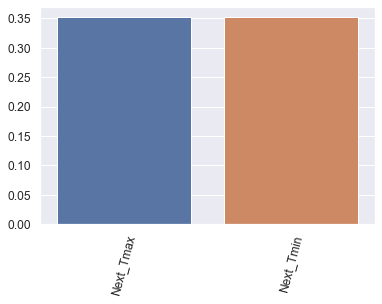

In [1223]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

**As we can see after dropping rows of LDAPS_RHmin columns ,other columns null value also has been dropped from dataset.**

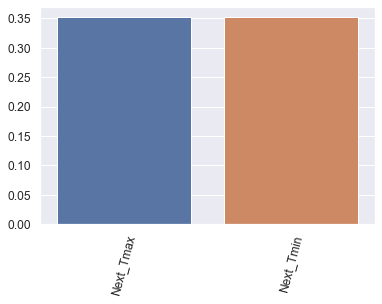

In [1224]:
null=missing(data)
s=sns.barplot(x=null.index,y=null)
s.set_xticklabels(s.get_xticklabels(),rotation=75);

### Dealing with Next_Tmax and Next_Tmin Target Variable

In [1225]:
data[data["Next_Tmax"].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
831       7.0  02-08-2013     29.600000     25.800000    76.202255   
856       7.0  03-08-2013     29.768464     23.225742    69.476059   
1073     24.0  11-08-2013     34.200000     25.100000    50.618851   
2465     16.0  05-08-2014     28.800000     23.100000    71.442566   
3696     22.0  23-07-2015     30.400000     23.400000    81.568771   
3714     15.0  24-07-2015     24.600000     22.400000    83.265244   
3739     15.0  25-07-2015     29.768464     23.225742    68.156593   
3886     12.0  31-07-2015     29.768464     23.225742    64.559479   
4205      6.0  13-08-2015     30.800000     23.900000    35.218002   
4230      6.0  14-08-2015     29.768464     23.225742    43.412582   
4255      6.0  15-08-2015     29.768464     23.225742    58.784390   
4280      6.0  16-08-2015     29.768464     23.225742    28.475870   
5656      7.0  09-08-2016     33.100000     26.800000    64.725151   
5681      7.0  10-08-2016     29.768464     23.225742    51.469501   
6060     11.0  25-08-2016     29.768464     23.225742    44.908253   
6268     19.0  02-07-2017     25.600000     21.700000    84.423805   
6357      8.0  06-07-2017     29.768464     23.225742    77.332268   
6435     11.0  09-07-2017     28.800000     24.500000    77.014175   
6907      8.0  28-07-2017     27.500000     24.300000    54.392185   
7254      5.0  11-08-2017     30.900000     23.300000    51.226562   
7304      5.0  13-08-2017     29.768464     23.225742    73.782753   
7344     20.0  14-08-2017     26.200000     22.100000    85.103630   
7504      5.0  21-08-2017     27.700000     23.300000    53.629204   
7554      5.0  23-08-2017     30.700000     23.700000    78.330040   
7571     22.0  23-08-2017     30.200000     24.900000    76.936493   
7604      5.0  25-08-2017     30.300000     21.700000    35.563965   
7682      8.0  28-08-2017     26.300000     18.100000    29.959215   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
831     94.058517         28.842727         26.442801   7.980686   87.715882   
856     93.672600         30.491629         25.081388   6.282423  124.191446   
1073    89.166397         33.414349         27.475249   6.084058   48.521008   
2465    90.695419         26.273760         23.419080   3.787889   41.739802   
3696    93.973579         26.724457         24.984435   5.779299   58.456456   
3714    94.153442         26.738321         24.585545   8.048991   43.391457   
3739    93.874550         28.502294         24.270829   5.819343   35.236471   
3886    86.083702         29.628166         25.745189   8.629767   26.564901   
4205    82.458534         32.241880         23.018172   6.547084   63.516243   
4230    84.317780         32.028639         24.274533   5.880758   54.278856   
4255    79.509987         28.628288         24.045805   4.762958   50.826542   
4280    89.183807         33.651696         21.381762   6.050666   61.250346   
5656    90.769173         31.730979         26.316541   5.095636  127.601342   
5681    88.160759         33.531711         27.066962   4.934146  139.353021   
6060    86.309982         26.065732         21.639797   9.656940   78.263273   
6268    99.652794         24.881373         22.821416   9.236040   41.559663   
6357    89.395378         27.467565         24.160557   7.628294   38.808770   
6435    90.517715         28.321989         24.563500  10.349091   53.364445   
6907    88.281052         30.742290         25.195872   6.311136   44.619934   
7254    85.210350         30.742346         23.130362   5.471810  138.030061   
7304    85.662842         25.370156         21.846991   7.367599   72.823796   
7344    98.765335         21.925545         19.703742  14.541317   45.193849   
7504    94.092056         30.448380         24.038216   5.289254  114.941728   
7554    91.991310         28.959303         24.378045  12.264002   76.349382   
7571    90.509560         29.339601         2

In [1226]:
data[data["Next_Tmax"].isnull()]["Next_Tmin"]

831    NaN
856    NaN
1073   NaN
2465   NaN
3696   NaN
3714   NaN
3739   NaN
3886   NaN
4205   NaN
4230   NaN
4255   NaN
4280   NaN
5656   NaN
5681   NaN
6060   NaN
6268   NaN
6357   NaN
6435   NaN
6907   NaN
7254   NaN
7304   NaN
7344   NaN
7504   NaN
7554   NaN
7571   NaN
7604   NaN
7682   NaN
Name: Next_Tmin, dtype: float64

**As we can see our both target variable having same rows null value.**

In [1227]:
data.shape

(7675, 25)

**As we have seen there are 27 rows missing in targer variable which is 0.35% so we will drop those rows.**

In [1228]:
data=data.dropna(axis=0,subset=["Next_Tmax","Next_Tmin"])

In [1229]:
data.shape

(7648, 25)

In [1230]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

**As we can see we have removed null value from dataset.**

# 6.Dealing with Date Column

In [1231]:
data["Date"].value_counts()

11-08-2016    25
05-08-2017    25
30-07-2013    25
03-07-2014    25
14-08-2016    25
              ..
14-08-2017    24
16-08-2015    24
28-08-2017    24
25-08-2016    24
23-08-2017    23
Name: Date, Length: 307, dtype: int64

**We will extract only year from date columns for our analysis.**

In [1232]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [1233]:
data.drop("Date",axis=1,inplace=True)

In [1234]:
data

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0     ...         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1     ...         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2     ...         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3     ...         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4     ...         0.0         0.0  37.5507  127.135   35.0380  0.5055   
...   ...         ...         ...      ...      ...       ...     ...   
7745  ...         0.0         0.0  37.5507  127.040   26.2980  0.5721   
7746  ...         0.0         0.0  37.5102  127.086   21.9668  0.1332   
7747  ...         0.0         0.0  37.5372  126.891   15.5876  0.1554   
7748  ...         0.0         0.0  37.5237  126.909   17.2956  0.2223   
7749  ...         0.0         0.0  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  year  
0         5992.895996       29.1       21.2  2013  
1         5869.312500       30.5       22.5  2013  
2         5863.555664       31.1       23.9  2013  
3         5856.964844       31.7       24.3  2013  
4         5859.552246       31.2       22.5  2013  
...               ...        ...        ...   ...  
7745      4456.024414       27.6       17.7  2017  
7746      4441.803711       28.0       17.1  2017  
7747      4443.313965       28.3       18.1  2017  
7748      4438.373535       28.6       18.8  2017  
7749      4451.345215       27.8       17.4  2017  

[7648 rows x 25 columns]

# 7. Exploratary Data Analysis

## 7.1 Univariate Analysis

In [1235]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year'],
      dtype='object')

<AxesSubplot:xlabel='station', ylabel='Density'>

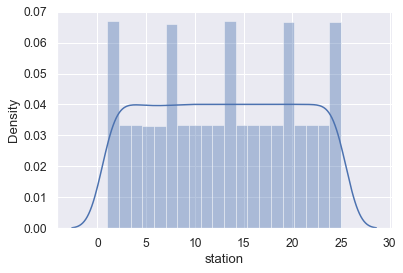

In [1236]:
sns.distplot(data["station"])

**Observation**
- Station data pattern looks like normal distribution.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

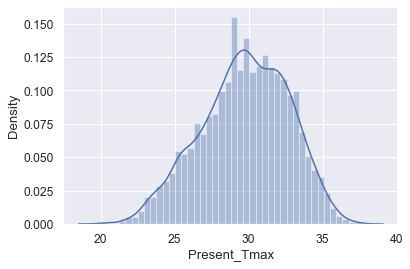

In [1237]:
sns.distplot(data["Present_Tmax"])

**Observation**
- Present Tmax columns looks like normal distribution and data is skeewed left side.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

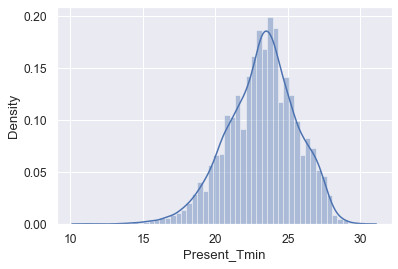

In [1238]:
sns.distplot(data["Present_Tmin"])

**Observation**
- Present Tmin columns look like normal distribution and data is left skeewed.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

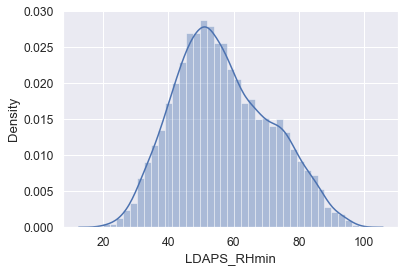

In [1239]:
sns.distplot(data["LDAPS_RHmin"])

**Observation**
- LDAPS RHmin data looks uniform distribution

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

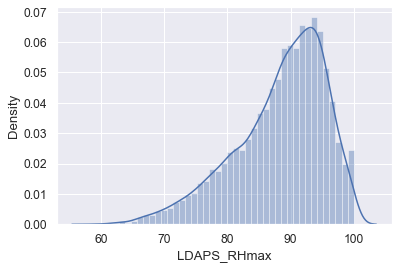

In [1240]:
sns.distplot(data["LDAPS_RHmax"])

**Observation**
- LDAPS_RHmax having left skeewed data.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

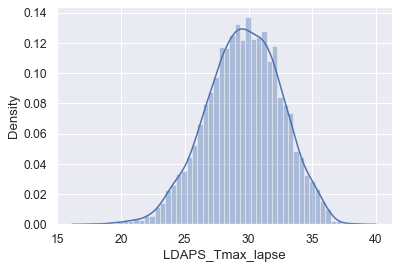

In [1241]:
sns.distplot(data["LDAPS_Tmax_lapse"])

**Observation**
- LDAPS Tmax lapse data is unifrom distribution

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

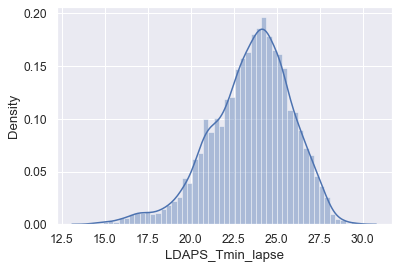

In [1242]:
sns.distplot(data["LDAPS_Tmin_lapse"])

**Observation**
-LDAPS Tmin lapse data looks littler skeewed left side.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

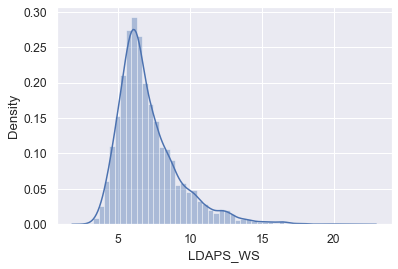

In [1243]:
sns.distplot(data["LDAPS_WS"])

**Observation**
- LDAPS_WS data is highly right side skeewed.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

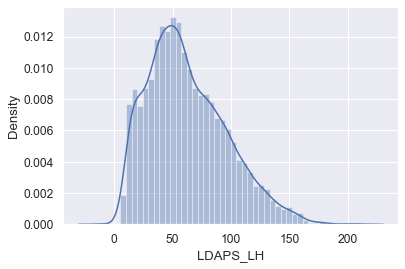

In [1244]:
sns.distplot(data["LDAPS_LH"])

**Observation**
- LDAPS_LH data is right side skeewed.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

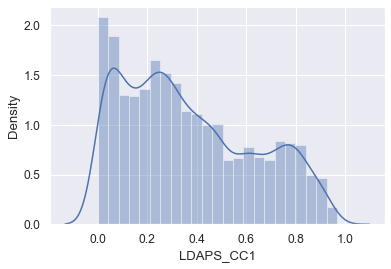

In [1245]:
sns.distplot(data["LDAPS_CC1"])

**Observation**
- LDAPS CC1 data is looks like normal distribution.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

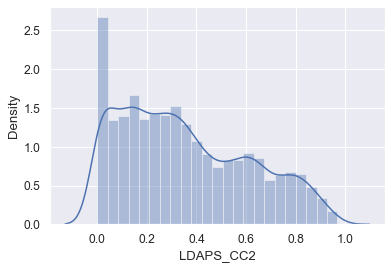

In [1246]:
sns.distplot(data["LDAPS_CC2"])

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

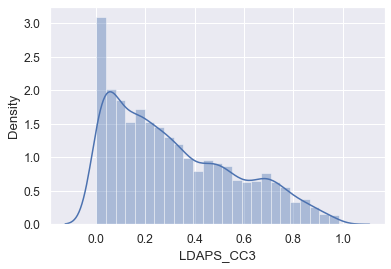

In [1247]:
sns.distplot(data["LDAPS_CC3"])

**Observation**
- LDAPS_CC4 data having right skeewed side

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

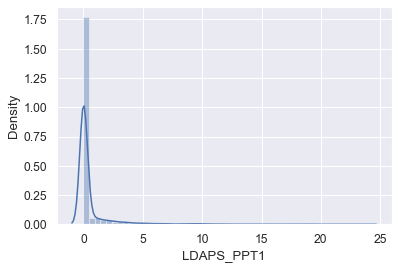

In [1248]:
sns.distplot(data["LDAPS_PPT1"])

**As we can there are some outliers so data is highly right skeewed.**

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

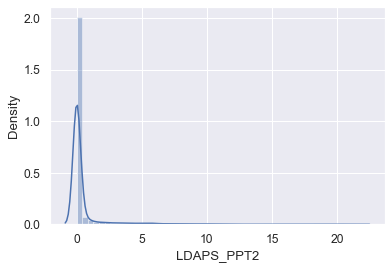

In [1249]:
sns.distplot(data["LDAPS_PPT2"])

**As we can there are some outliers so data is highly right skeewed.**

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

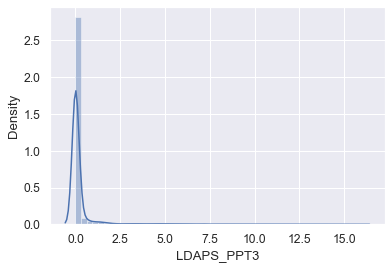

In [1250]:
sns.distplot(data["LDAPS_PPT3"])

**Data is highly skeewed right side.**

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

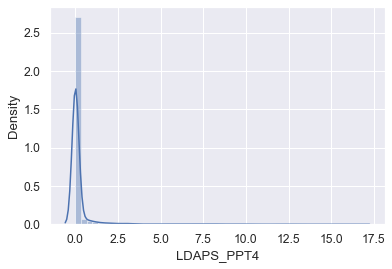

In [1251]:
sns.distplot(data["LDAPS_PPT4"])

**Data has highly skeewed right side.**

<AxesSubplot:xlabel='lat', ylabel='Density'>

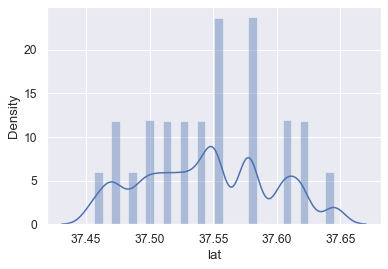

In [1252]:
sns.distplot(data["lat"])

**As we have seen that distribution is not absolute normal distribution but shape is looks like normal distribution**

<AxesSubplot:xlabel='lon', ylabel='Density'>

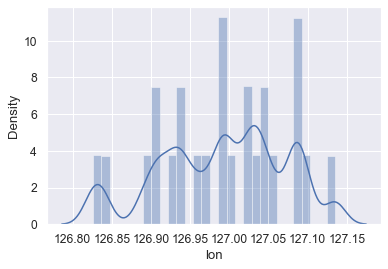

In [1253]:
sns.distplot(data["lon"])

**As we have seen that distribution is not absolute normal distribution but shape is looks like normal distribution**

<AxesSubplot:xlabel='DEM', ylabel='Density'>

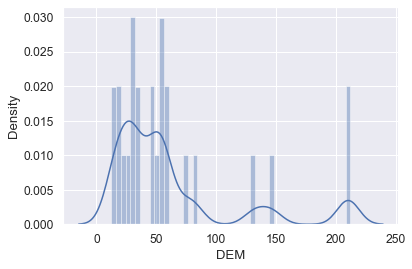

In [1254]:
sns.distplot(data["DEM"])

**Data is looks like normal distribution**

<AxesSubplot:xlabel='Slope', ylabel='Density'>

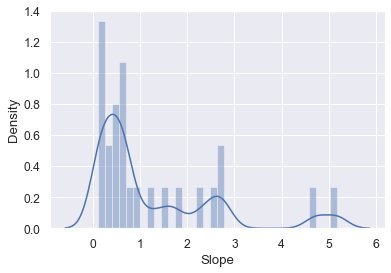

In [1255]:
sns.distplot(data["Slope"])

**Data is looks like normal distribution**

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

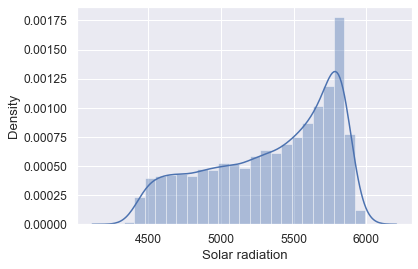

In [1256]:
sns.distplot(data["Solar radiation"])

**Data is looks like normal distribution**

<AxesSubplot:xlabel='year', ylabel='Density'>

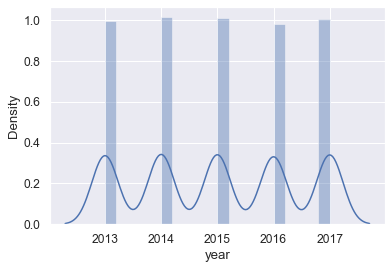

In [1257]:
sns.distplot(data["year"])

**Data distribution is normal.**

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

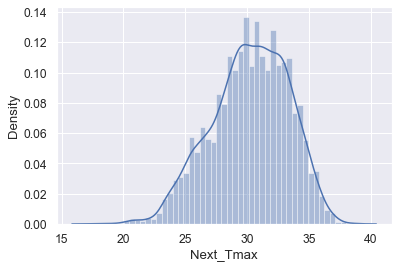

In [1258]:
sns.distplot(data["Next_Tmax"])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

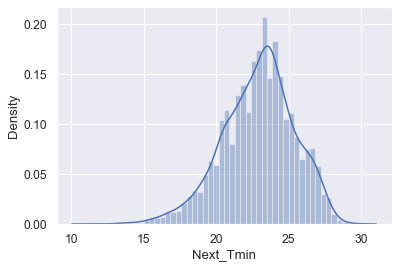

In [1259]:
sns.distplot(data["Next_Tmin"])

## 7.2 Bivariate Analysis

## station Vs Next_Tmax

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

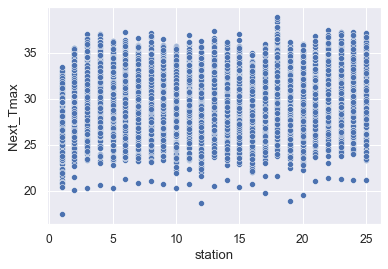

In [1260]:
sns.scatterplot(x="station",y="Next_Tmax",data=data)

## station Vs Next_Tmin

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

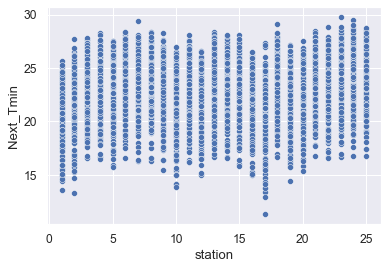

In [1261]:
sns.scatterplot(x="station",y="Next_Tmin",data=data)

## Present_Tmax VS Next_Tmax

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

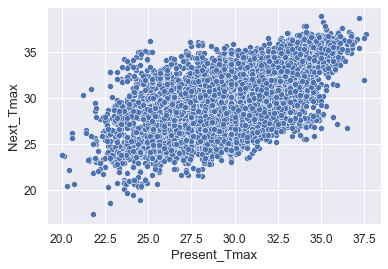

In [1262]:
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=data)

**As we can see there is linearty regression relationship between Next_Tmax and Present_Tmax.**

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

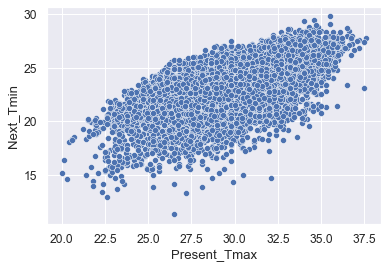

In [1263]:
sns.scatterplot(x="Present_Tmax",y="Next_Tmin",data=data)

**As we can see there is linearty regression relationship between Next_Tmax and Present_Tmax.**

## Present_Tmin VS Next_Tmax

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

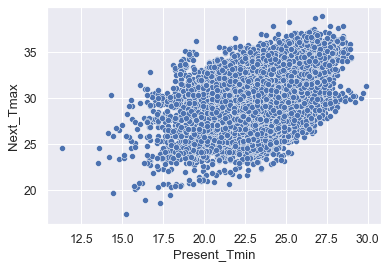

In [1264]:
sns.scatterplot(x="Present_Tmin",y="Next_Tmax",data=data)

## Present_Tmin VS Next_Tmax

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

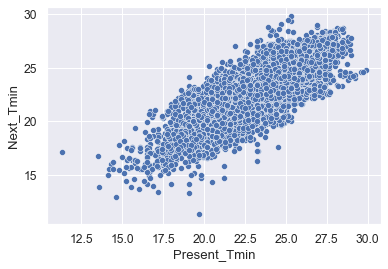

In [1265]:
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=data)

## LDAPS_RHmin VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

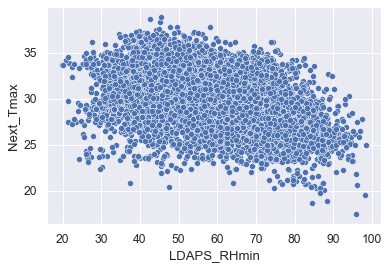

In [1266]:
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmax",data=data)

## LDAPS_RHmin VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

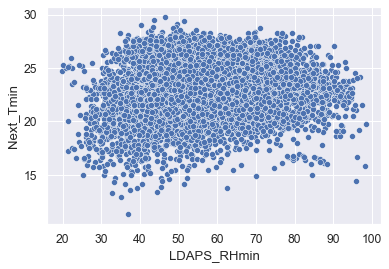

In [1267]:
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmin",data=data)

## LDAPS_Tmax_lapse VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

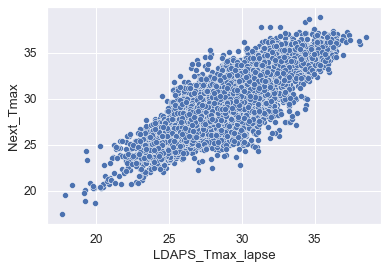

In [1268]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=data)

**As we can see there is linearty regression relationship between LDAPS_Tmax and Next_Tmax.**

## LDAPS_Tmax_lapse VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

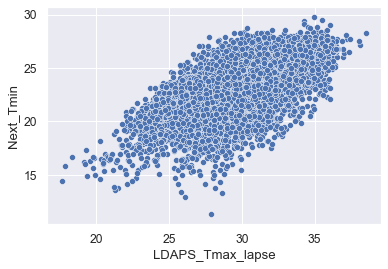

In [1269]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=data)

**As we can see there is linearty regression relationship between LDAPS_Tmax_lapse and Next_Tmin.**

## LDAPS_WS VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

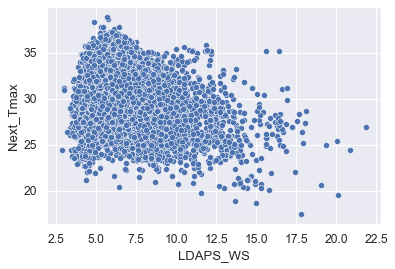

In [1270]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmax",data=data)

## LDAPS_WS VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

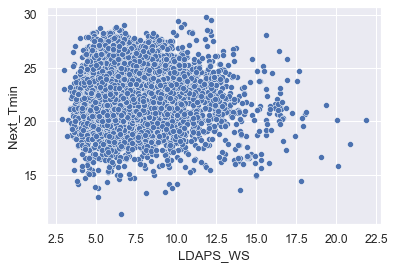

In [1271]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmin",data=data)

## LDAPS_LH VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

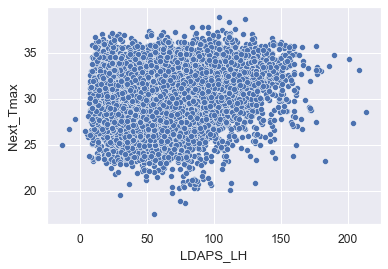

In [1272]:
sns.scatterplot(x="LDAPS_LH",y="Next_Tmax",data=data)

## LDAPS_LH VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

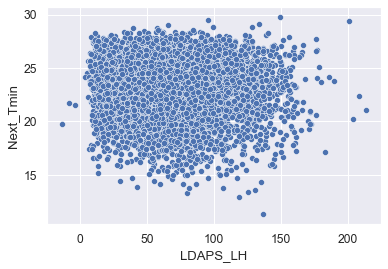

In [1273]:
sns.scatterplot(x="LDAPS_LH",y="Next_Tmin",data=data)

## LDAPS_CC1 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

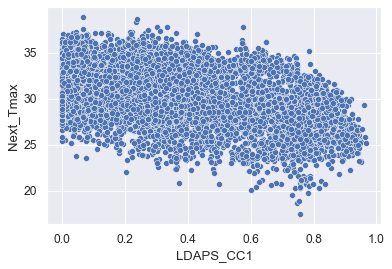

In [1274]:
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmax",data=data)

## LDAPS_CC1 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

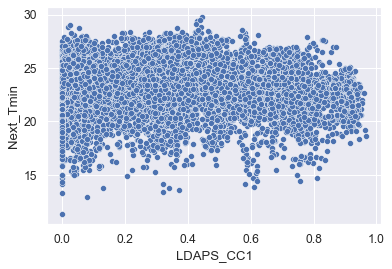

In [1275]:
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmin",data=data)

## LDAPS_CC2 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

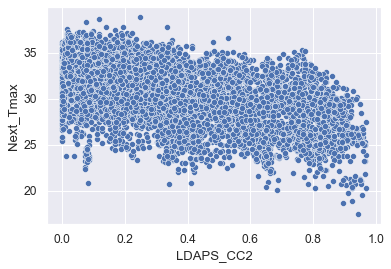

In [1276]:
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmax",data=data)

## LDAPS_CC2 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

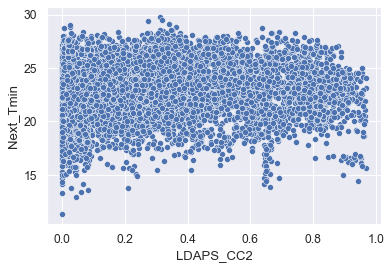

In [1277]:
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmin",data=data)

## LDAPS_CC3 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

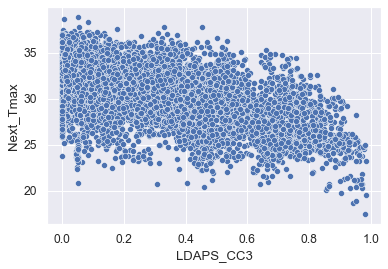

In [1278]:
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmax",data=data)

## LDAPS_CC3 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

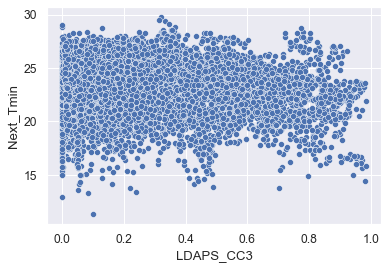

In [1279]:
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmin",data=data)

## LDAPS_CC4 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

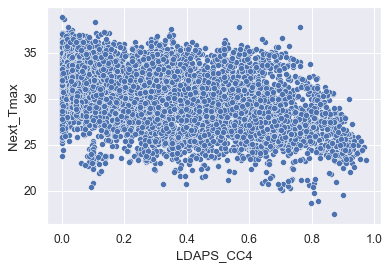

In [1280]:
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmax",data=data)

## LDAPS_CC4 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

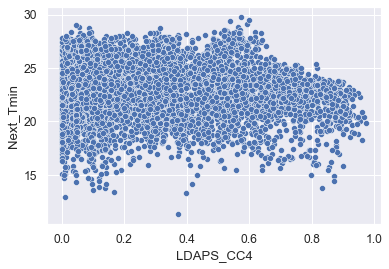

In [1281]:
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmin",data=data)

## LDAPS_PPT1 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

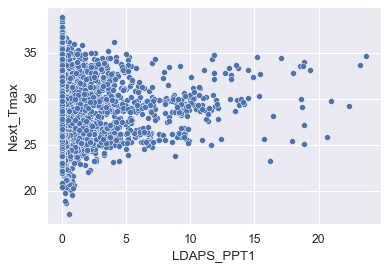

In [1282]:
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmax",data=data)

## LDAPS_PPT1 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

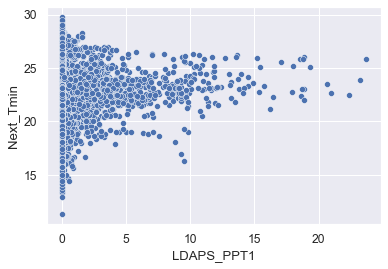

In [1283]:
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmin",data=data)

## LDAPS_PPT2 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

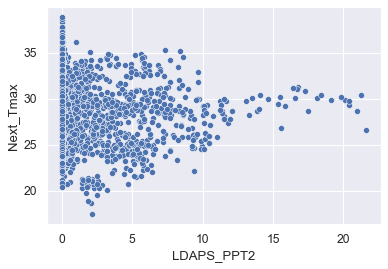

In [1284]:
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmax",data=data)

## LDAPS_PPT2 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

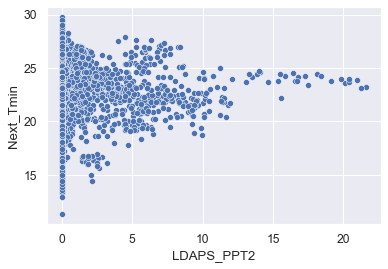

In [1285]:
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmin",data=data)

## LDAPS_PPT3 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

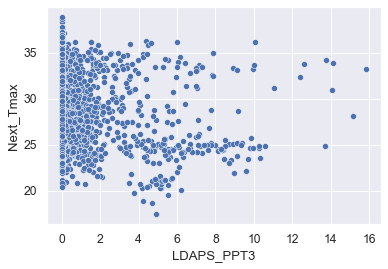

In [1286]:
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmax",data=data)

## LDAPS_PPT3 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

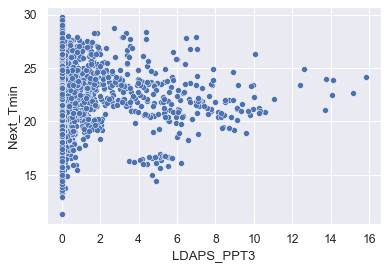

In [1287]:
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmin",data=data)

## LDAPS_PPT4 VS Next_Tmax

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

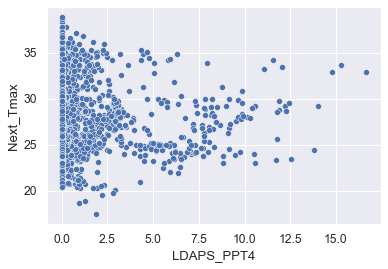

In [1288]:
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmax",data=data)

## LDAPS_PPT4 VS Next_Tmin

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

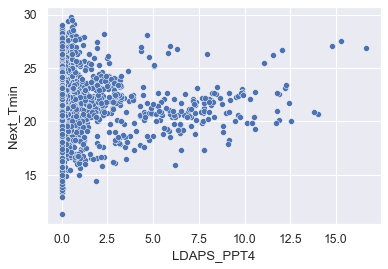

In [1289]:
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmin",data=data)

## lat VS Next_Tmax

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

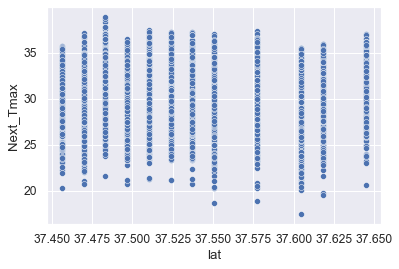

In [1290]:
sns.scatterplot(x="lat",y="Next_Tmax",data=data)

## lat VS Next_Tmin

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

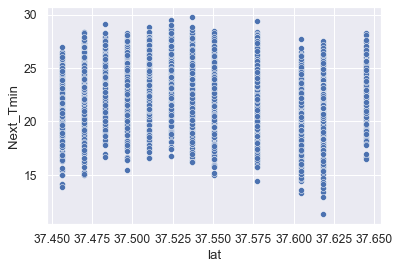

In [1291]:
sns.scatterplot(x="lat",y="Next_Tmin",data=data)

## DEM VS Next_Tmax

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

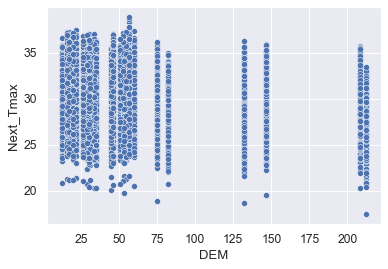

In [1292]:
sns.scatterplot(x="DEM",y="Next_Tmax",data=data)

## DEM VS Next_Tmin

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

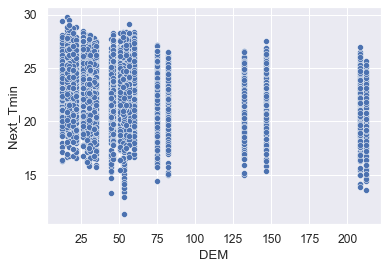

In [1293]:
sns.scatterplot(x="DEM",y="Next_Tmin",data=data)

## Slope VS Next_Tmax

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

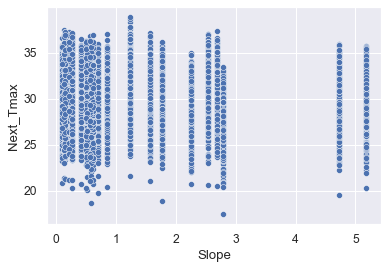

In [1294]:
sns.scatterplot(x="Slope",y="Next_Tmax",data=data)

## Slope VS Next_Tmin

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

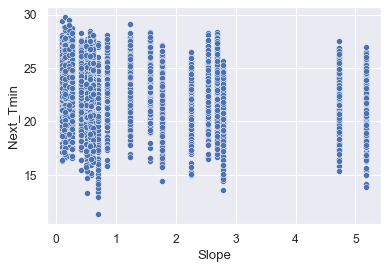

In [1295]:
sns.scatterplot(x="Slope",y="Next_Tmin",data=data)

## Solar radiation VS Next_Tmax

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

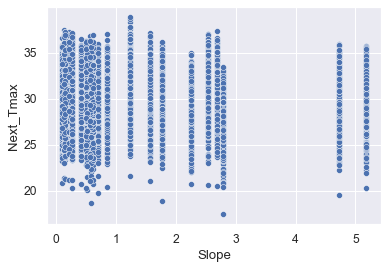

In [1296]:
sns.scatterplot(x="Slope",y="Next_Tmax",data=data)

## Solar radiation VS Next_Tmax

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

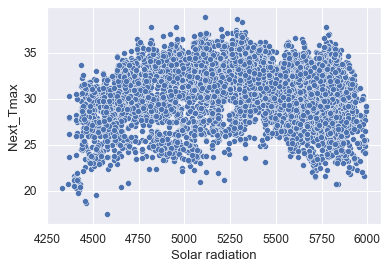

In [1297]:
sns.scatterplot(x="Solar radiation",y="Next_Tmax",data=data)

## Solar radiation VS Next_Tmin

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

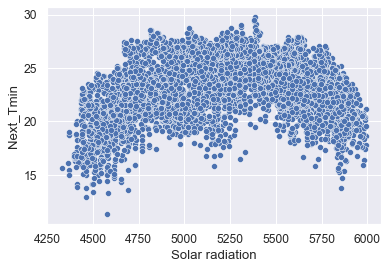

In [1298]:
sns.scatterplot(x="Solar radiation",y="Next_Tmin",data=data)

## year VS Next_Tmax

<AxesSubplot:xlabel='year', ylabel='Next_Tmax'>

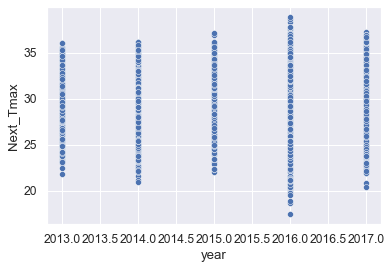

In [1299]:
sns.scatterplot(x="year",y="Next_Tmax",data=data)

<AxesSubplot:xlabel='year', ylabel='Next_Tmin'>

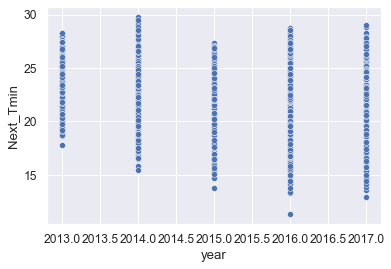

In [1300]:
sns.scatterplot(x="year",y="Next_Tmin",data=data)

## 7.3 MultiVariate Analysis

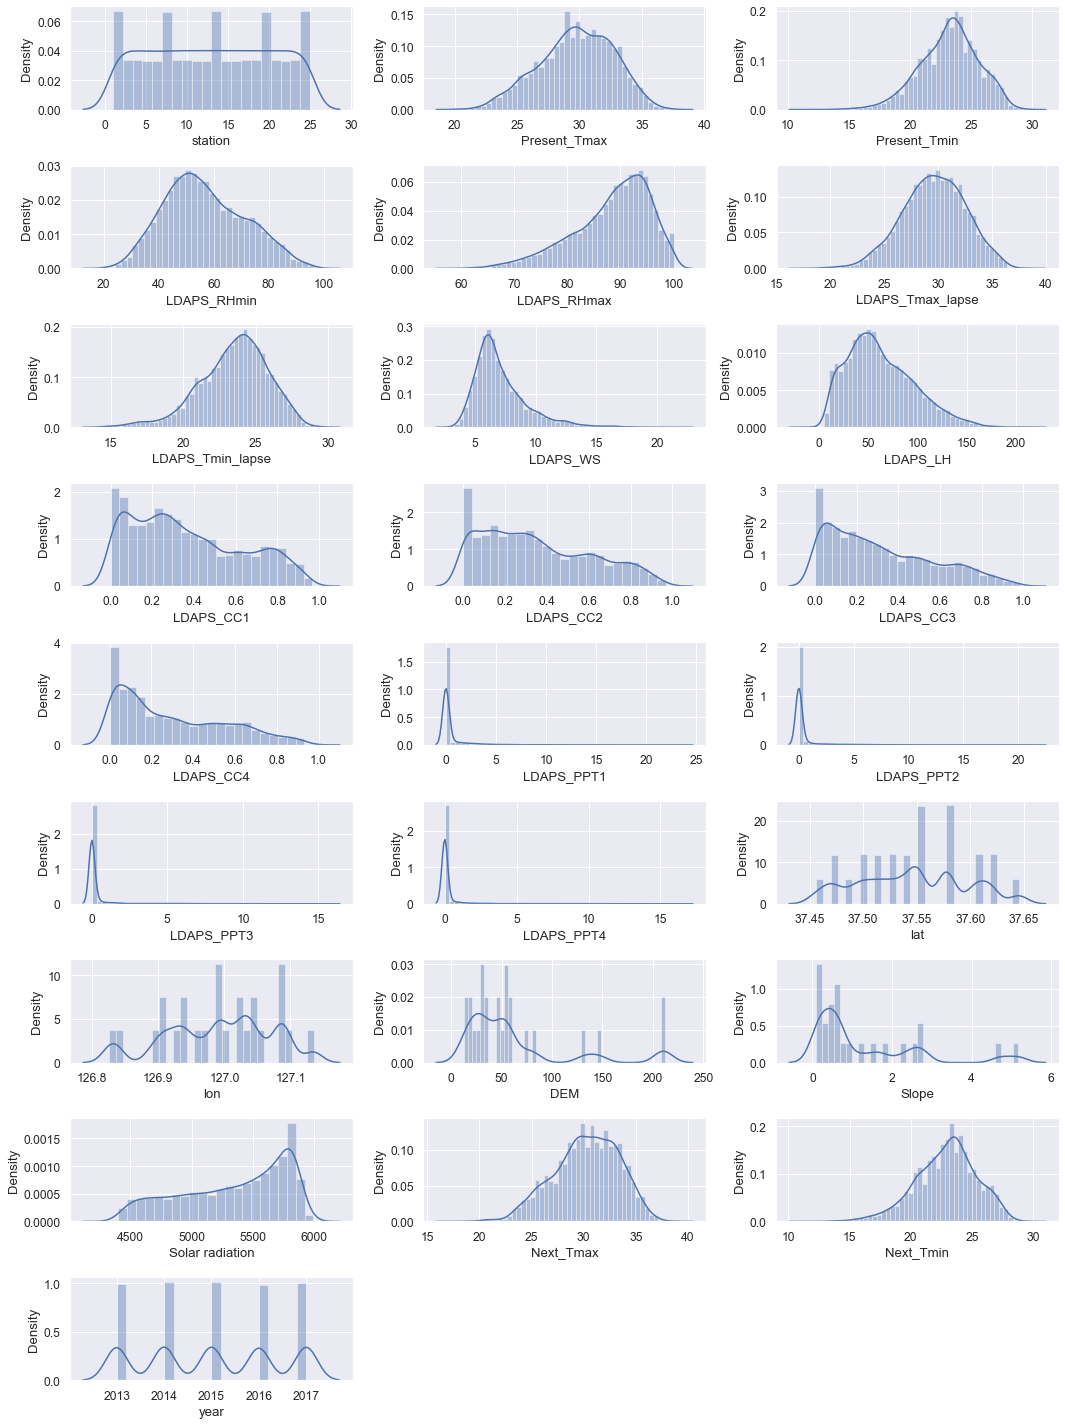

In [1301]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=25:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- Most of the data look like normal distribution.
- Some columns data are highly skeewed.

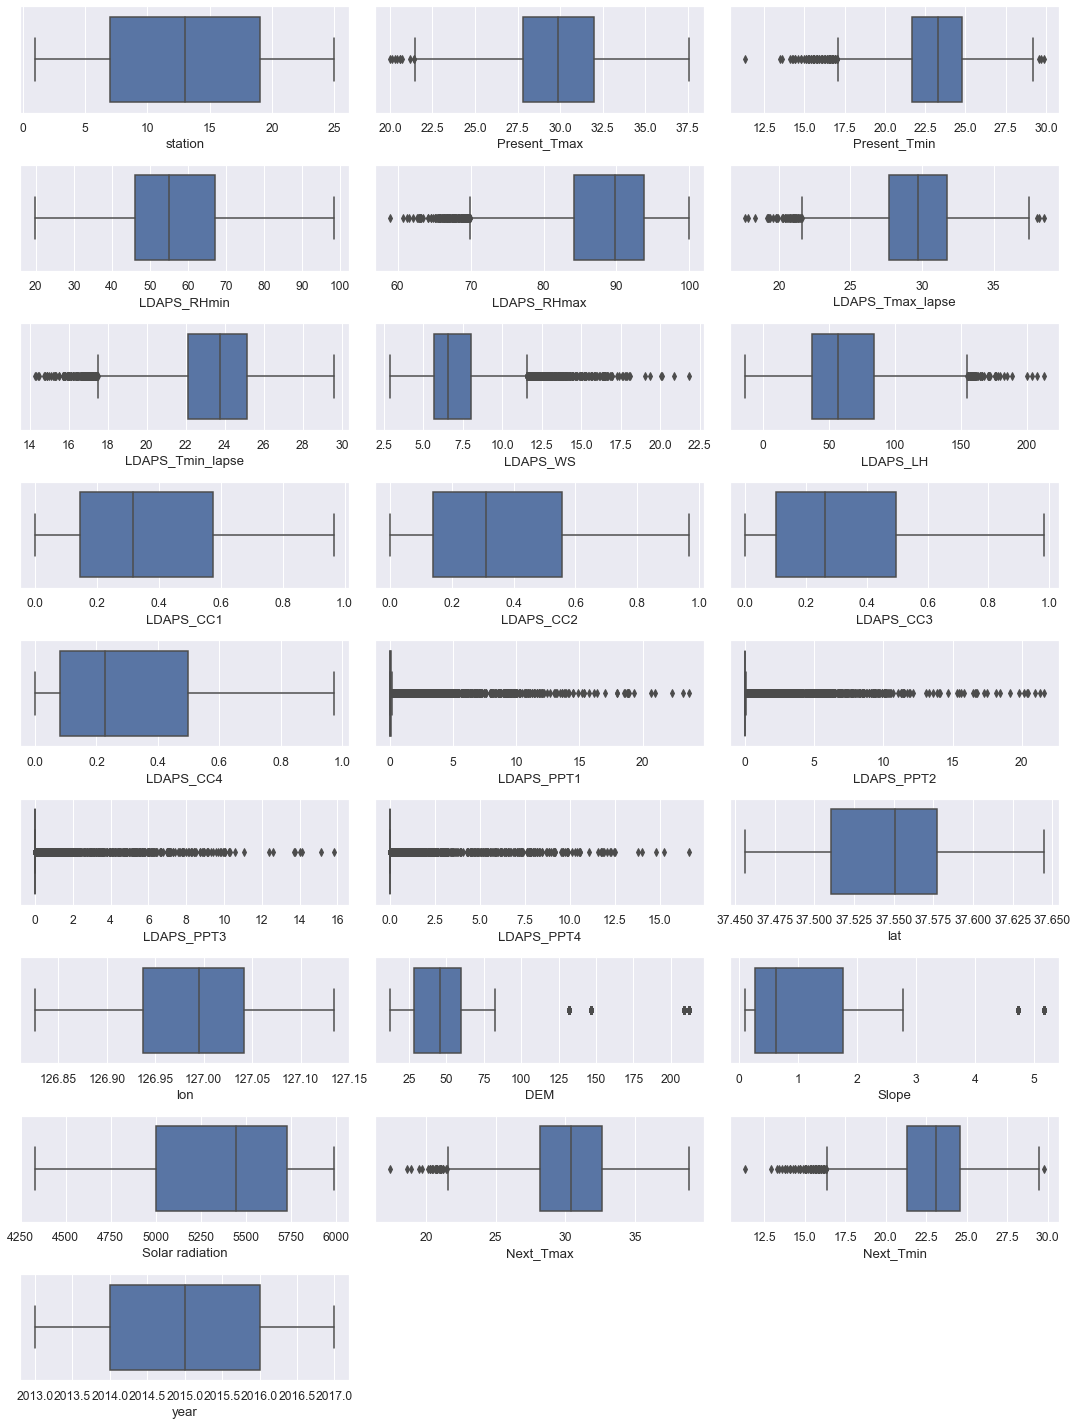

In [1302]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=25:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- As we can see there are many columns where having outiliers due to which data were skeewed right and left side.

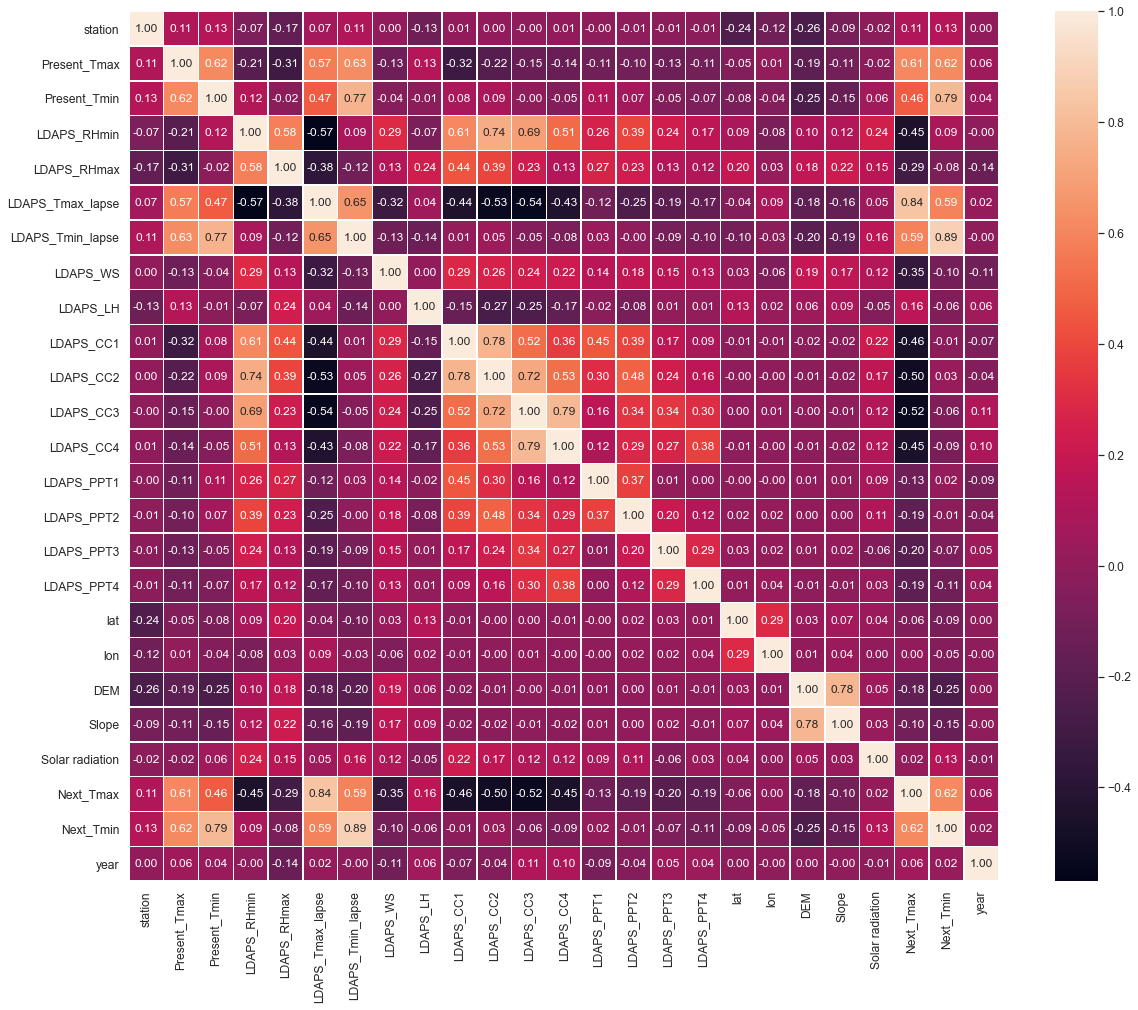

In [1303]:
plt.subplots(figsize=(20, 16))
cm=np.corrcoef(data.values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':12}, yticklabels = data.columns, xticklabels = data.columns,linewidths=.5)

**Observation**
- As we can see through heat map that lots of columns having correleaton to each other, so there would be problem of multicollinearity which we need to deal with.
- Also we can see some featues are having very less correleation with our target variable.

In [1304]:
data.corr()["Next_Tmax"].sort_values()

LDAPS_CC3          -0.523502
LDAPS_CC2          -0.498909
LDAPS_CC1          -0.460129
LDAPS_CC4          -0.453908
LDAPS_RHmin        -0.446496
LDAPS_WS           -0.351797
LDAPS_RHmax        -0.290102
LDAPS_PPT3         -0.204616
LDAPS_PPT4         -0.188317
LDAPS_PPT2         -0.187029
DEM                -0.175303
LDAPS_PPT1         -0.125929
Slope              -0.104970
lat                -0.055545
lon                 0.001889
Solar radiation     0.015838
year                0.061167
station             0.108579
LDAPS_LH            0.156993
Present_Tmin        0.461784
LDAPS_Tmin_lapse    0.591945
Present_Tmax        0.608078
Next_Tmin           0.616451
LDAPS_Tmax_lapse    0.835606
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

In [1305]:
data.corr()["Next_Tmin"].sort_values()

DEM                -0.249072
Slope              -0.148577
LDAPS_PPT4         -0.111139
LDAPS_WS           -0.101545
LDAPS_CC4          -0.087705
lat                -0.085065
LDAPS_RHmax        -0.075815
LDAPS_PPT3         -0.069291
LDAPS_LH           -0.059107
LDAPS_CC3          -0.057102
lon                -0.047622
LDAPS_CC1          -0.012845
LDAPS_PPT2         -0.012795
LDAPS_PPT1          0.017188
year                0.019957
LDAPS_CC2           0.029869
LDAPS_RHmin         0.093525
Solar radiation     0.125985
station             0.128259
LDAPS_Tmax_lapse    0.590082
Next_Tmax           0.616451
Present_Tmax        0.619049
Present_Tmin        0.794409
LDAPS_Tmin_lapse    0.886617
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

**Observation**
- We can see correlation with target variable and independant variable

# 8. Dealing with Outliers in dataset

### Present_Tmax

<AxesSubplot:xlabel='Present_Tmax'>

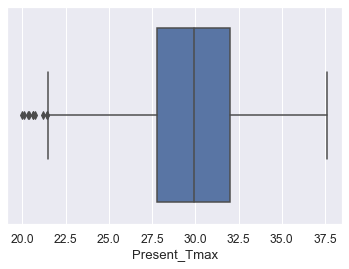

In [1306]:
sns.boxplot(data["Present_Tmax"])

In [1307]:
upper_limit=data["Present_Tmax"].mean()+3*data["Present_Tmax"].std()
lower_limit=data["Present_Tmax"].mean()-3*data["Present_Tmax"].std()

data["Present_Tmax"]=np.where(data["Present_Tmax"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Present_Tmax"]<lower_limit,
                           lower_limit,
                           data["Present_Tmax"]
                        )
                    )

<AxesSubplot:xlabel='Present_Tmax'>

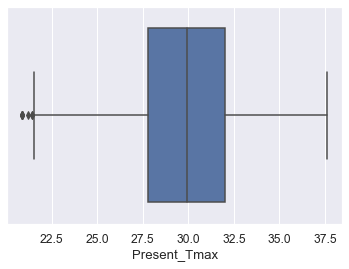

In [1308]:
sns.boxplot(data["Present_Tmax"])

### Present Tmin

<AxesSubplot:xlabel='Present_Tmin'>

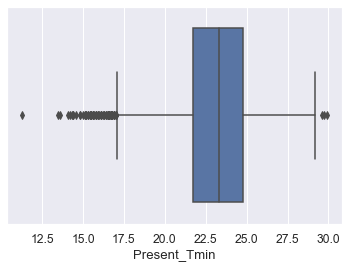

In [1309]:
sns.boxplot(data["Present_Tmin"])

In [1310]:
upper_limit=data["Present_Tmin"].mean()+3*data["Present_Tmin"].std()
lower_limit=data["Present_Tmin"].mean()-3*data["Present_Tmin"].std()

data["Present_Tmin"]=np.where(data["Present_Tmin"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Present_Tmin"]<lower_limit,
                           lower_limit,
                           data["Present_Tmin"]
                        )
                    )

<AxesSubplot:xlabel='Present_Tmin'>

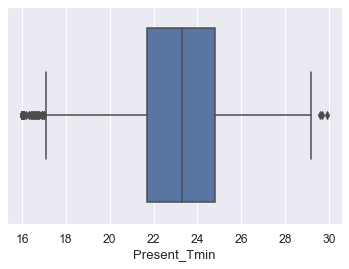

In [1311]:
sns.boxplot(data["Present_Tmin"])

### Dealing with LDAPS_RHmax

<AxesSubplot:xlabel='LDAPS_RHmax'>

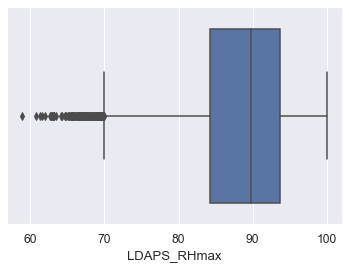

In [1312]:
sns.boxplot(data["LDAPS_RHmax"])

In [1313]:
upper_limit=data["LDAPS_RHmax"].mean()+3*data["LDAPS_RHmax"].std()
lower_limit=data["LDAPS_RHmax"].mean()-3*data["LDAPS_RHmax"].std()

data["LDAPS_RHmax"]=np.where(data["LDAPS_RHmax"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_RHmax"]<lower_limit,
                           lower_limit,
                           data["LDAPS_RHmax"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_RHmax'>

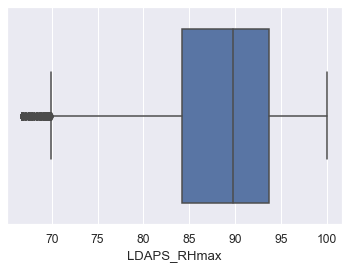

In [1314]:
sns.boxplot(data["LDAPS_RHmax"])

### Dealing with LDAPS_Tmax_lapse

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

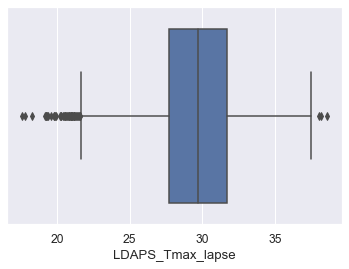

In [1315]:
sns.boxplot(data["LDAPS_Tmax_lapse"])

In [1316]:
upper_limit=data["LDAPS_Tmax_lapse"].mean()+3*data["LDAPS_Tmax_lapse"].std()
lower_limit=data["LDAPS_Tmax_lapse"].mean()-3*data["LDAPS_Tmax_lapse"].std()

data["LDAPS_Tmax_lapse"]=np.where(data["LDAPS_Tmax_lapse"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_Tmax_lapse"]<lower_limit,
                           lower_limit,
                           data["LDAPS_Tmax_lapse"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

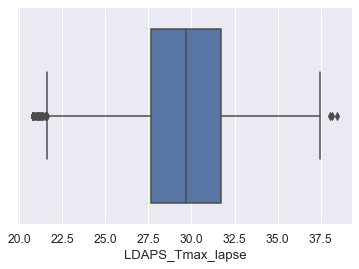

In [1317]:
sns.boxplot(data["LDAPS_Tmax_lapse"])

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

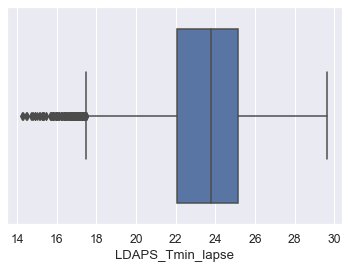

In [1318]:
sns.boxplot(data["LDAPS_Tmin_lapse"])

In [1319]:
upper_limit=data["LDAPS_Tmin_lapse"].mean()+3*data["LDAPS_Tmin_lapse"].std()
lower_limit=data["LDAPS_Tmin_lapse"].mean()-3*data["LDAPS_Tmin_lapse"].std()

data["LDAPS_Tmin_lapse"]=np.where(data["LDAPS_Tmin_lapse"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_Tmin_lapse"]<lower_limit,
                           lower_limit,
                           data["LDAPS_Tmin_lapse"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

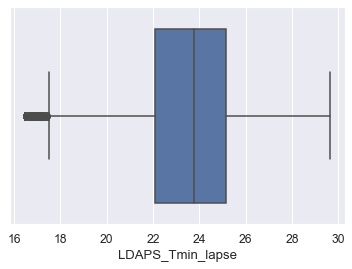

In [1320]:
sns.boxplot(data["LDAPS_Tmin_lapse"])

### LDAPS_WS

<AxesSubplot:xlabel='LDAPS_WS'>

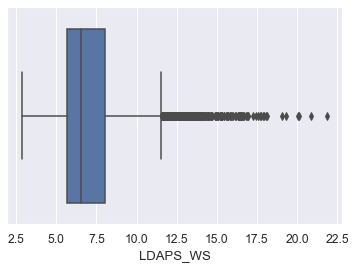

In [1321]:
sns.boxplot(data["LDAPS_WS"])

In [1322]:
upper_limit=data["LDAPS_WS"].mean()+3*data["LDAPS_WS"].std()
lower_limit=data["LDAPS_WS"].mean()-3*data["LDAPS_WS"].std()

data["LDAPS_WS"]=np.where(data["LDAPS_WS"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_WS"]<lower_limit,
                           lower_limit,
                           data["LDAPS_WS"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_WS'>

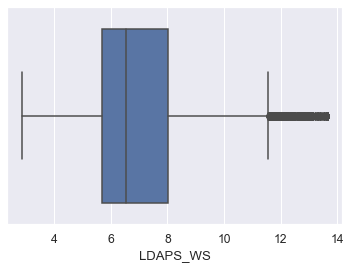

In [1323]:
sns.boxplot(data["LDAPS_WS"])

### LDAPS_LH

<AxesSubplot:xlabel='LDAPS_LH'>

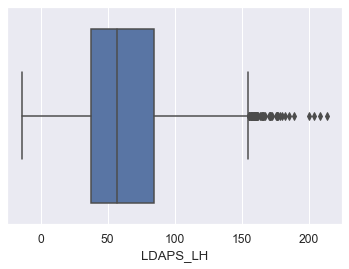

In [1324]:
sns.boxplot(data["LDAPS_LH"])

In [1325]:
upper_limit=data["LDAPS_LH"].mean()+3*data["LDAPS_LH"].std()
lower_limit=data["LDAPS_LH"].mean()-3*data["LDAPS_LH"].std()

data["LDAPS_LH"]=np.where(data["LDAPS_LH"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_LH"]<lower_limit,
                           lower_limit,
                           data["LDAPS_LH"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_LH'>

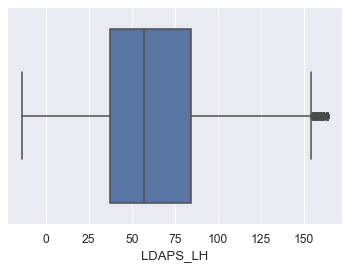

In [1326]:
sns.boxplot(data["LDAPS_LH"])

### LDAPS_PPT1

<AxesSubplot:xlabel='LDAPS_PPT1'>

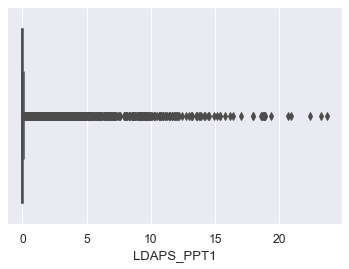

In [1327]:
sns.boxplot(data["LDAPS_PPT1"])

In [1328]:
upper_limit=data["LDAPS_PPT1"].mean()+3*data["LDAPS_PPT1"].std()
lower_limit=data["LDAPS_PPT1"].mean()-3*data["LDAPS_PPT1"].std()

data["LDAPS_PPT1"]=np.where(data["LDAPS_PPT1"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_PPT1"]<lower_limit,
                           lower_limit,
                           data["LDAPS_PPT1"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_PPT1'>

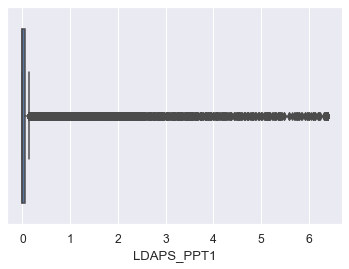

In [1329]:
sns.boxplot(data["LDAPS_PPT1"])

### LDAPS_PPT2

<AxesSubplot:xlabel='LDAPS_PPT2'>

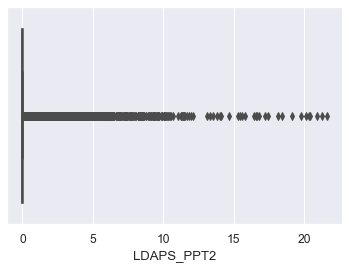

In [1330]:
sns.boxplot(data["LDAPS_PPT2"])

In [1331]:
upper_limit=data["LDAPS_PPT2"].mean()+3*data["LDAPS_PPT2"].std()
lower_limit=data["LDAPS_PPT2"].mean()-3*data["LDAPS_PPT2"].std()

data["LDAPS_PPT2"]=np.where(data["LDAPS_PPT2"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_PPT2"]<lower_limit,
                           lower_limit,
                           data["LDAPS_PPT2"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_PPT2'>

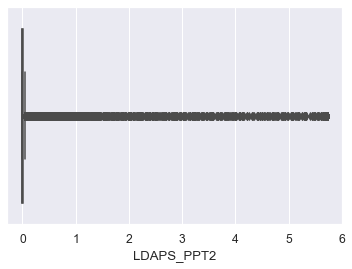

In [1332]:
sns.boxplot(data["LDAPS_PPT2"])

### LDAPS_PPT3

<AxesSubplot:xlabel='LDAPS_PPT3'>

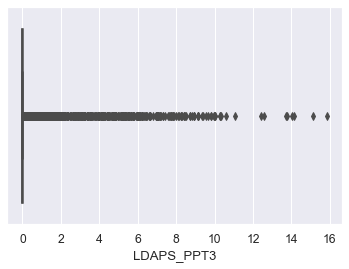

In [1333]:
sns.boxplot(data["LDAPS_PPT3"])

In [1334]:
upper_limit=data["LDAPS_PPT3"].mean()+3*data["LDAPS_PPT3"].std()
lower_limit=data["LDAPS_PPT3"].mean()-3*data["LDAPS_PPT3"].std()

data["LDAPS_PPT3"]=np.where(data["LDAPS_PPT3"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_PPT3"]<lower_limit,
                           lower_limit,
                           data["LDAPS_PPT3"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_PPT3'>

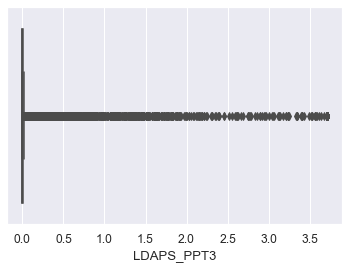

In [1335]:
sns.boxplot(data["LDAPS_PPT3"])

<AxesSubplot:xlabel='LDAPS_PPT4'>

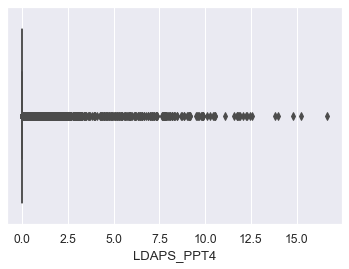

In [1336]:
sns.boxplot(data["LDAPS_PPT4"])

In [1337]:
upper_limit=data["LDAPS_PPT4"].mean()+3*data["LDAPS_PPT4"].std()
lower_limit=data["LDAPS_PPT4"].mean()-3*data["LDAPS_PPT4"].std()

data["LDAPS_PPT4"]=np.where(data["LDAPS_PPT4"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["LDAPS_PPT4"]<lower_limit,
                           lower_limit,
                           data["LDAPS_PPT4"]
                        )
                    )

<AxesSubplot:xlabel='LDAPS_PPT4'>

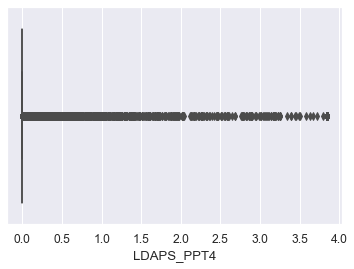

In [1338]:
sns.boxplot(data["LDAPS_PPT4"])

### Dealing with DEM

<AxesSubplot:xlabel='DEM'>

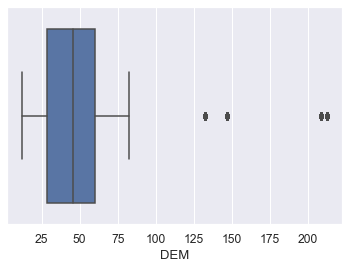

In [1339]:
sns.boxplot(data["DEM"])

In [1340]:
upper_limit=data["DEM"].mean()+3*data["DEM"].std()
lower_limit=data["DEM"].mean()-3*data["DEM"].std()

data["DEM"]=np.where(data["DEM"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["DEM"]<lower_limit,
                           lower_limit,
                           data["DEM"]
                        )
                    )

<AxesSubplot:xlabel='DEM'>

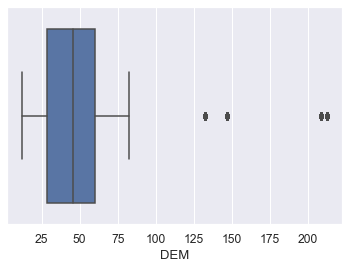

In [1341]:
sns.boxplot(data["DEM"])

<AxesSubplot:xlabel='Slope'>

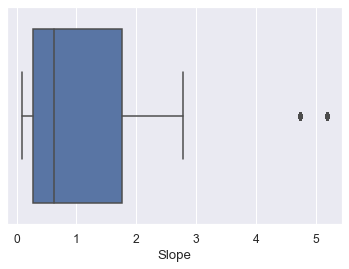

In [1342]:
sns.boxplot(data["Slope"])

In [1343]:
upper_limit=data["Slope"].mean()+3*data["Slope"].std()
lower_limit=data["Slope"].mean()-3*data["Slope"].std()

data["Slope"]=np.where(data["Slope"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["Slope"]<lower_limit,
                           lower_limit,
                           data["Slope"]
                        )
                    )

<AxesSubplot:xlabel='Slope'>

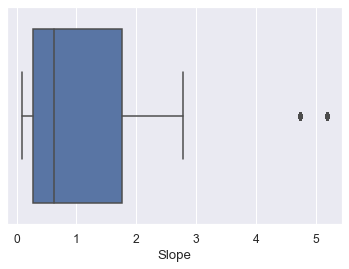

In [1344]:
sns.boxplot(data["Slope"])

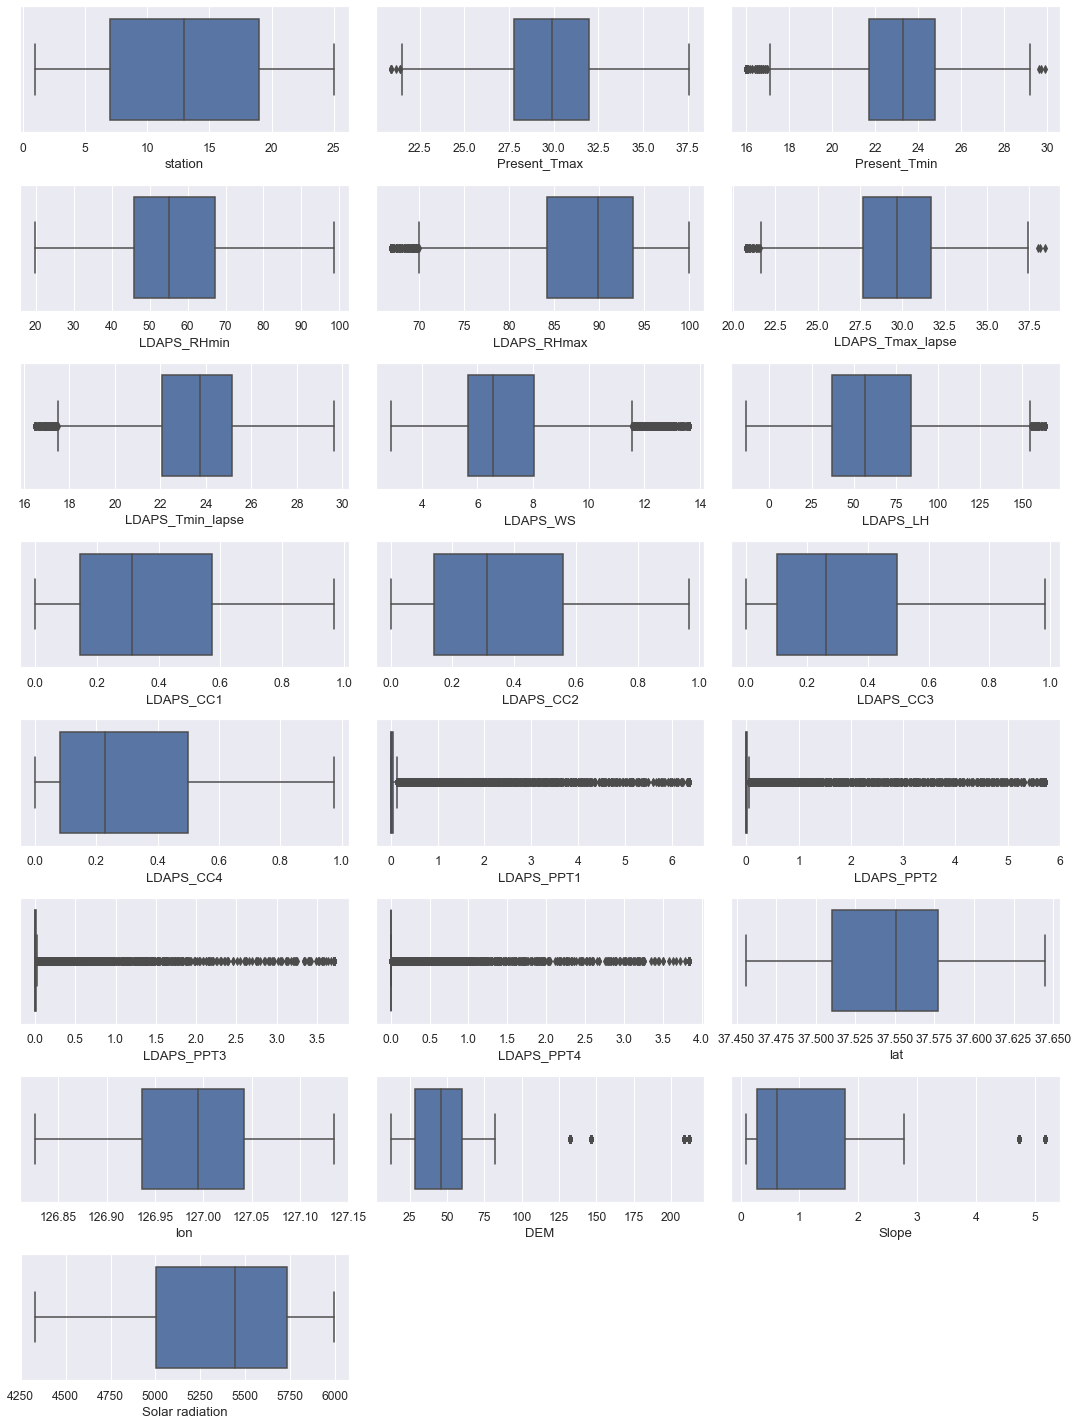

In [1345]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

# 9. Dealing with Skeewness

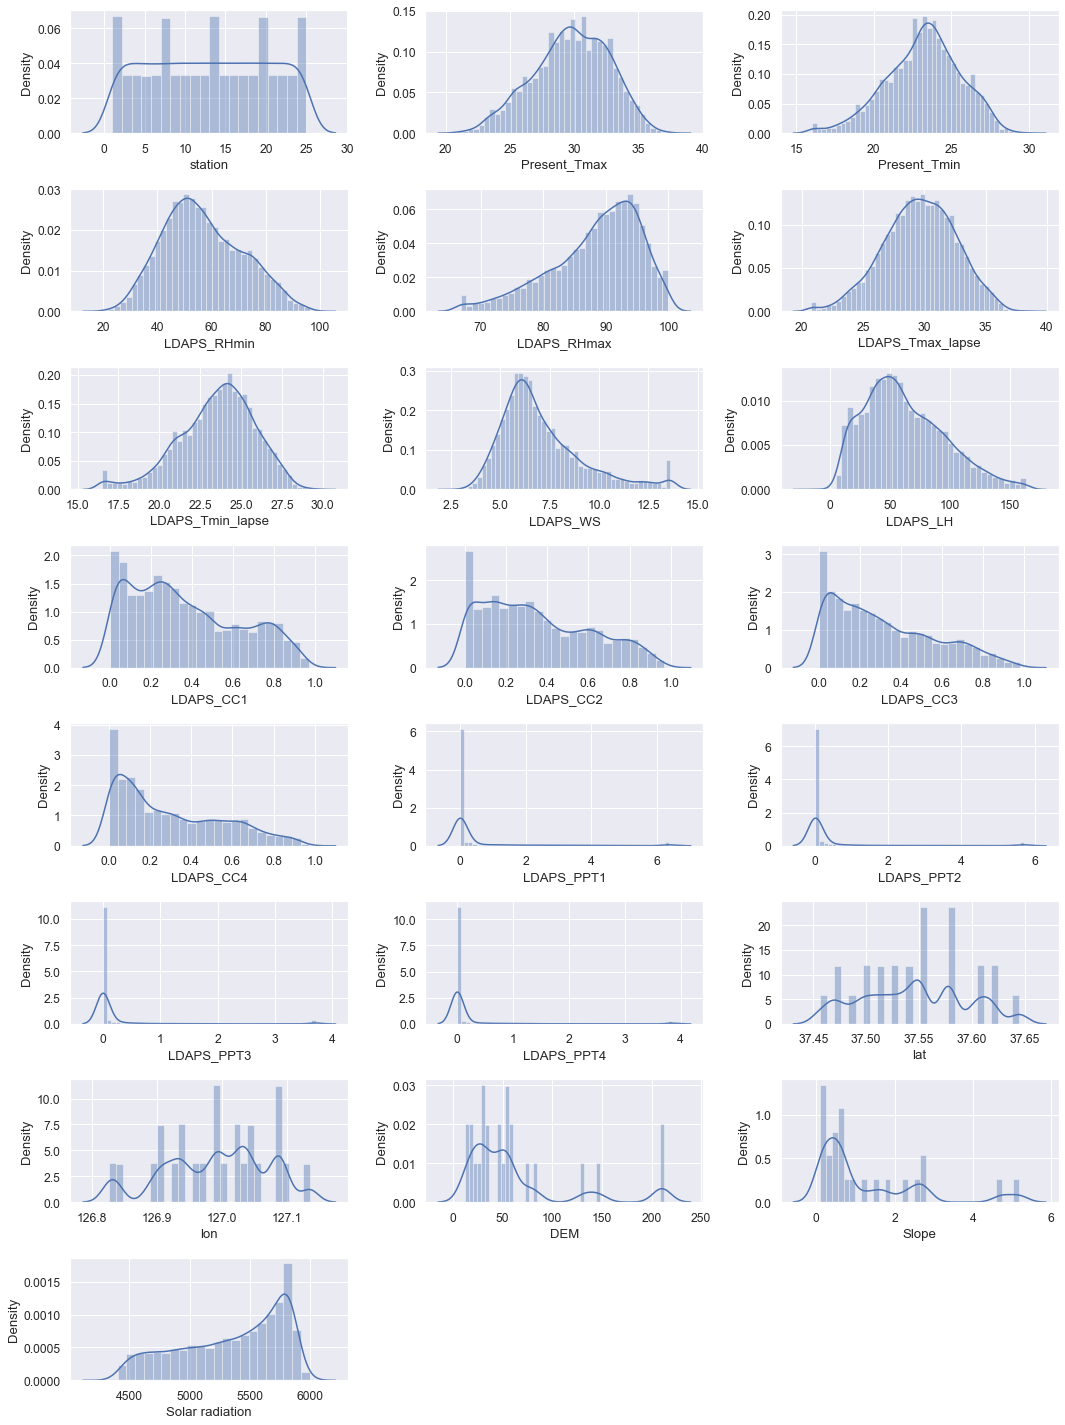

In [1346]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

In [1347]:
data.skew()

station            -0.002800
Present_Tmax       -0.254624
Present_Tmin       -0.302299
LDAPS_RHmin         0.301532
LDAPS_RHmax        -0.808114
LDAPS_Tmax_lapse   -0.192555
LDAPS_Tmin_lapse   -0.513675
LDAPS_WS            1.168132
LDAPS_LH            0.623808
LDAPS_CC1           0.458080
LDAPS_CC2           0.472555
LDAPS_CC3           0.638484
LDAPS_CC4           0.662400
LDAPS_PPT1          3.284592
LDAPS_PPT2          3.556010
LDAPS_PPT3          4.178377
LDAPS_PPT4          4.332286
lat                 0.086463
lon                -0.286661
DEM                 1.721727
Slope               1.560855
Solar radiation    -0.523740
Next_Tmax          -0.335304
Next_Tmin          -0.393463
year                0.009068
dtype: float64

### Dealing with LDAPS_RHmax with log function

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

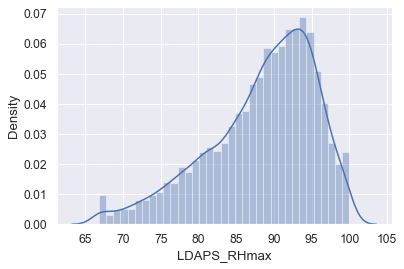

In [1348]:
sns.distplot(data["LDAPS_RHmax"])

In [1349]:
data["LDAPS_RHmax"]=np.log1p(data["LDAPS_RHmax"])

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

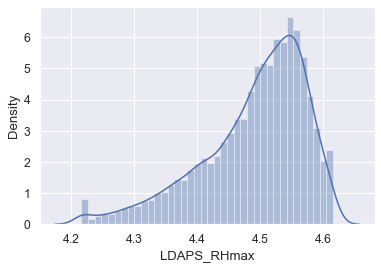

In [1350]:
sns.distplot(data["LDAPS_RHmax"])

### Dealing with LDAPS_CC3 with log function

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

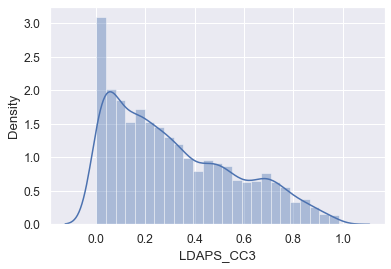

In [1351]:
sns.distplot(data["LDAPS_CC3"])

In [1352]:
data["LDAPS_CC3"]=np.log1p(data["LDAPS_CC3"])

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

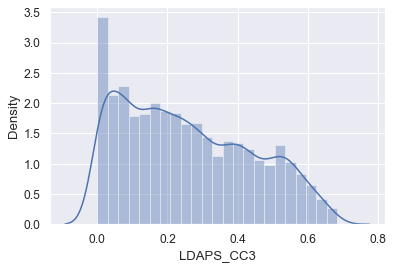

In [1353]:
sns.distplot(data["LDAPS_CC3"])

### Dealing with LDAPS_CC4 with log function

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

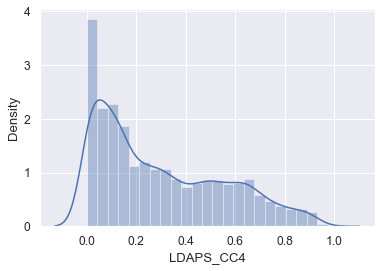

In [1354]:
sns.distplot(data["LDAPS_CC4"])

In [1355]:
data["LDAPS_CC4"]=np.log1p(data["LDAPS_CC4"])

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

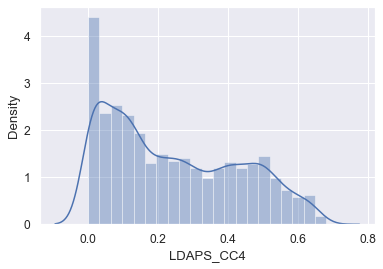

In [1356]:
sns.distplot(data["LDAPS_CC4"])

### Dealing with LDAPS_PPT1 with log function

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

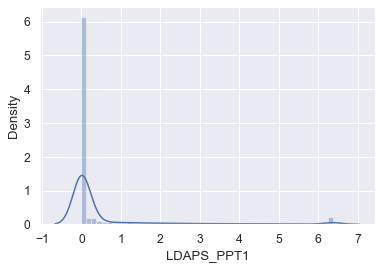

In [1357]:
sns.distplot(data["LDAPS_PPT1"])

In [1358]:
data["LDAPS_PPT1"]=np.log1p(data["LDAPS_PPT1"])

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

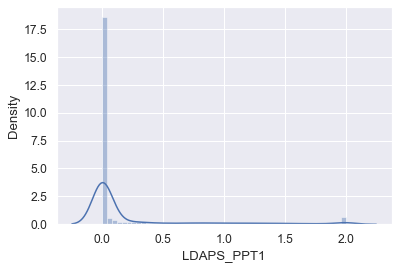

In [1359]:
sns.distplot(data["LDAPS_PPT1"])

### Dealing with LDAPS_PPT2 with log function

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

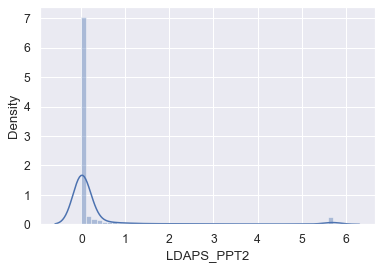

In [1360]:
sns.distplot(data["LDAPS_PPT2"])

In [1361]:
data["LDAPS_PPT1"]=np.log1p(data["LDAPS_PPT2"])

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

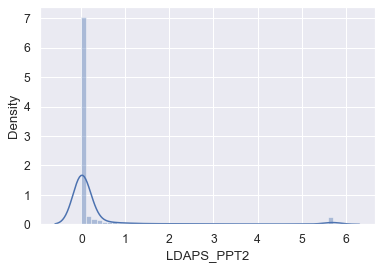

In [1362]:
sns.distplot(data["LDAPS_PPT2"])










### Dealing with LDAPS_PPT3 with log function

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

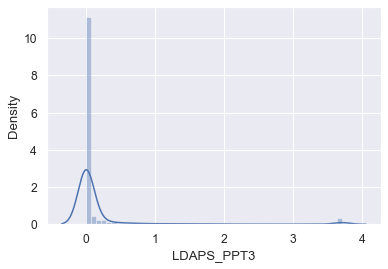

In [1363]:
sns.distplot(data["LDAPS_PPT3"])

In [1364]:
data["LDAPS_PPT3"]=np.log1p(data["LDAPS_PPT3"])

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

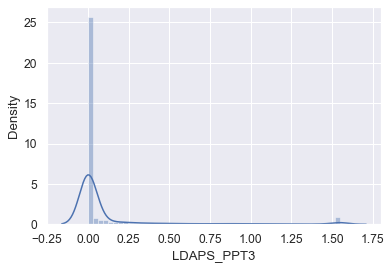

In [1365]:
sns.distplot(data["LDAPS_PPT3"])

### Dealing with LDAPS_PPT4 with log function

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

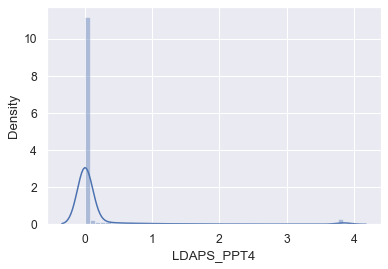

In [1366]:
sns.distplot(data["LDAPS_PPT4"])

In [1367]:
data["LDAPS_PPT4"]=np.log1p(data["LDAPS_PPT4"])

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

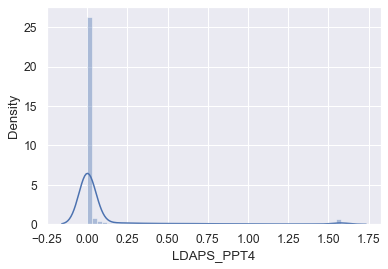

In [1368]:
sns.distplot(data["LDAPS_PPT4"])

### Dealing with DEM with log function

<AxesSubplot:xlabel='DEM', ylabel='Density'>

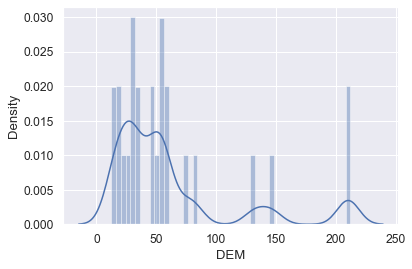

In [1369]:
sns.distplot(data["DEM"])

In [1370]:
data["DEM"]=np.log1p(data["DEM"])

<AxesSubplot:xlabel='DEM', ylabel='Density'>

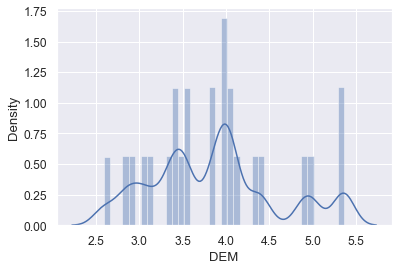

In [1371]:
sns.distplot(data["DEM"])

### Dealing with Slope with log function

<AxesSubplot:xlabel='Slope', ylabel='Density'>

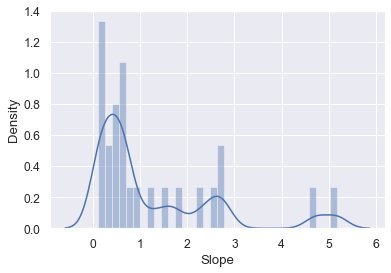

In [1372]:
sns.distplot(data["Slope"])

In [1373]:
data["Slope"]=np.log1p(data["Slope"])

<AxesSubplot:xlabel='Slope', ylabel='Density'>

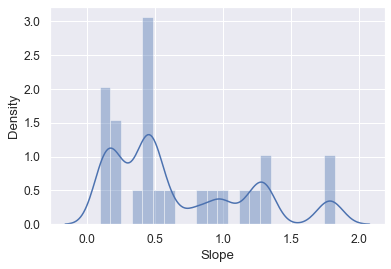

In [1374]:
sns.distplot(data["Slope"])

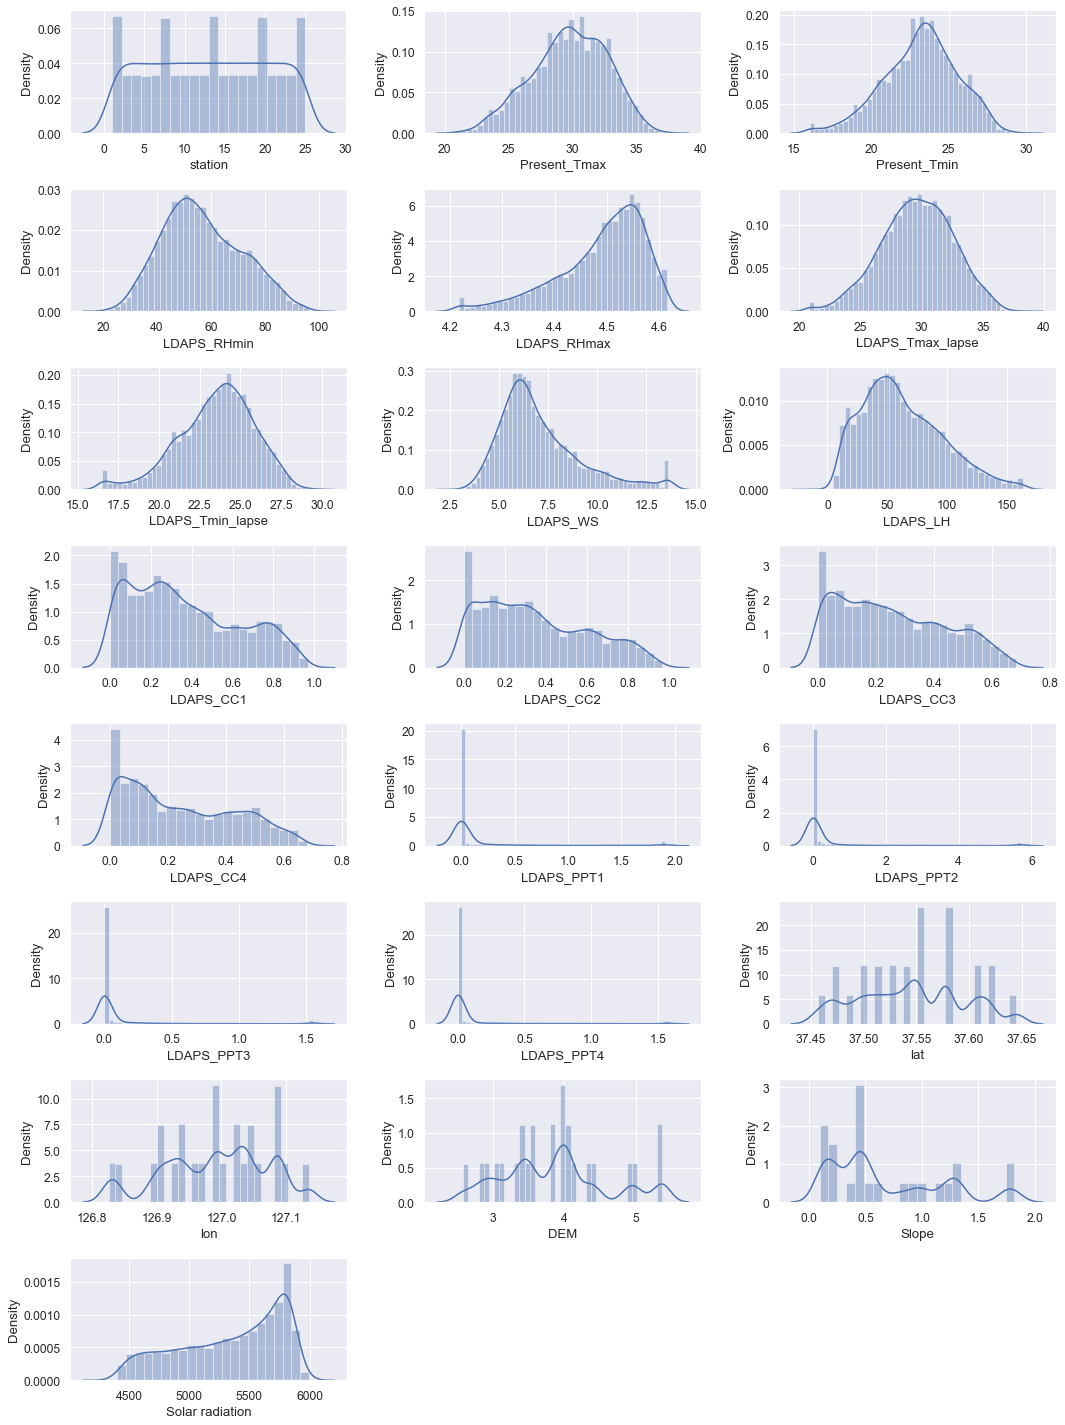

In [1375]:
plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

# 10. Split Train and Test Dataset

In [1376]:
x=data.drop(["Next_Tmax","Next_Tmin"],axis=1)

In [1377]:
x.shape

(7648, 23)

In [1378]:
data.shape

(7648, 25)

In [1379]:
y=data[["Next_Tmax","Next_Tmin"]]

In [1380]:
y.shape

(7648, 2)

# 11. Applying Standard Scaler for Feature Scaling

In [1381]:
from sklearn.preprocessing import StandardScaler

In [1382]:
scaler=StandardScaler()

In [1383]:
x_scaled=scaler.fit_transform(x)

# 12. Checking Multicollinearity

In [1384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1385]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [1386]:
vif

variables        VIF
0            station   1.278771
1       Present_Tmax   2.776414
2       Present_Tmin   3.188311
3        LDAPS_RHmin   6.397880
4        LDAPS_RHmax   2.242835
5   LDAPS_Tmax_lapse   7.461084
6   LDAPS_Tmin_lapse   7.242095
7           LDAPS_WS   1.316629
8           LDAPS_LH   1.557000
9          LDAPS_CC1   3.145653
10         LDAPS_CC2   5.604428
11         LDAPS_CC3   5.390968
12         LDAPS_CC4   3.053865
13        LDAPS_PPT1  27.557734
14        LDAPS_PPT2  23.977053
15        LDAPS_PPT3   1.499578
16        LDAPS_PPT4   1.523040
17               lat   1.259876
18               lon   1.203159
19               DEM   3.340398
20             Slope   2.995533
21   Solar radiation   1.246568
22              year   1.117975

In [1387]:
vif[vif["VIF"]>5]

variables        VIF
3        LDAPS_RHmin   6.397880
5   LDAPS_Tmax_lapse   7.461084
6   LDAPS_Tmin_lapse   7.242095
10         LDAPS_CC2   5.604428
11         LDAPS_CC3   5.390968
13        LDAPS_PPT1  27.557734
14        LDAPS_PPT2  23.977053

**AS we can see mentioned above vairable having multicollinearity issue, so we will drop these feature based on our variables correleation.We will remove LDAPS_PPT1,LDAPS_CC2 and LDAPS_Tmax_lapse.**

In [1388]:
data=data.drop(columns=["LDAPS_PPT1","LDAPS_CC2","LDAPS_Tmax_lapse","LDAPS_RHmin","station"],axis=1)

In [1389]:
x=data.drop(["Next_Tmax","Next_Tmin"],axis=1)

In [1390]:
y=data[["Next_Tmax","Next_Tmin"]]

In [1391]:
from sklearn.preprocessing import StandardScaler

In [1392]:
scaler=StandardScaler()

In [1393]:
x_scaled=scaler.fit_transform(x)

# 13. Feature Extracting with PCA

In [1394]:
from sklearn.decomposition import PCA

In [1395]:
pca=PCA()

In [1396]:
principalcomponent=pca.fit_transform(x_scaled)

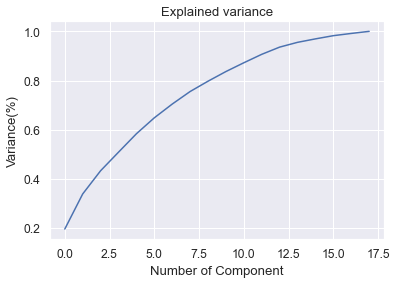

In [1397]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Component")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**As we can see more than 12 components the model covers more than 90% of variance.we will see accuracy withouth removing any features.**

In [1398]:
pca=PCA(n_components=12)

In [1399]:
pca_data=pca.fit_transform(x_scaled)

# Model Building

# 14.1 Linear Regression

In [1400]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1401]:
lr=LinearRegression()

In [1402]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

## 14.2 Choosing Best Random state

In [1403]:
from sklearn.metrics import r2_score
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training score is-",r2_score(y_train,pred_train)*100)
        print("Testing score is-",r2_score(y_test,pred_test)*100)
   

At random state 2 Model perfrom well
At random state 2
Training score is- 77.30331131002959
Testing score is- 77.25939979757601
At random state 40 Model perfrom well
At random state 40
Training score is- 77.28954652781658
Testing score is- 77.29510551646442
At random state 54 Model perfrom well
At random state 54
Training score is- 77.26775852753475
Testing score is- 77.34450269715565
At random state 59 Model perfrom well
At random state 59
Training score is- 77.27563661113021
Testing score is- 77.34248129806336
At random state 62 Model perfrom well
At random state 62
Training score is- 77.31738053177946
Testing score is- 77.25841811898424
At random state 66 Model perfrom well
At random state 66
Training score is- 77.28298230086945
Testing score is- 77.34409885745802
At random state 76 Model perfrom well
At random state 76
Training score is- 77.2896665161106
Testing score is- 77.33869713410768
At random state 79 Model perfrom well
At random state 79
Training score is- 77.28499140636018

**We can choose 477 as best random state.**

In [1404]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=477)

In [1405]:
lr.fit(x_train,y_train)

LinearRegression()

## 14.3 Evaluation Matrix

In [1406]:
y_pred=lr.predict(x_test)

In [1407]:
lr_score=r2_score(y_test,y_pred)

In [1408]:
lr_score

0.7728144763682607

In [1409]:
MAE=mean_absolute_error(y_test,y_pred)

In [1410]:
MAE

1.0479984247578662

In [1411]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [1412]:
RMSE

1.3833946675874644

In [1413]:
train_pred=lr.predict(x_train)

In [1414]:
r2_score(y_train,train_pred)

0.7728689060145051

## 14.4 Choosing Best CV for model

In [1415]:
from sklearn.model_selection import cross_val_score

In [1417]:
for j in range(2,15):
    lr_score=cross_val_score(lr,x_train,y_train,cv=j)
    lr_s=lr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",lr_score*100)
    print("R2_score:",lr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [77.95794633 75.89760586]
R2_score: 76.92777609188197


AT CV :- 3
Cross Validation score is: [77.59458986 76.6004423  76.93243198]
R2_score: 77.0424880469953


AT CV :- 4
Cross Validation score is: [78.93577122 77.19209866 74.61203226 77.00607545]
R2_score: 76.93649439888179


AT CV :- 5
Cross Validation score is: [78.4819415  77.86976386 75.67633442 76.38460289 76.72775938]
R2_score: 77.02808040930364


AT CV :- 6
Cross Validation score is: [78.93358029 76.36308611 78.87705973 73.62873893 76.39395455 77.5375929 ]
R2_score: 76.95566875066162


AT CV :- 7
Cross Validation score is: [78.35456422 78.737364   77.46640657 75.97233892 72.98261335 77.26573355
 77.96596487]
R2_score: 76.96356935175201


AT CV :- 8
Cross Validation score is: [77.16063526 80.36708225 74.72021245 79.17385422 73.34069246 75.92840506
 76.94228264 77.29958256]
R2_score: 76.86659336363675


AT CV :- 9
Cross Validation score is: [77.64910549 79.97794859 75.15815959 78.26306362 77

**We can choose Best CV 3**

In [1424]:
cross_val_score(lr,x_train,y_train,cv=3)

array([0.7759459 , 0.76600442, 0.76932432])

In [1426]:
lr_cv_score=cross_val_score(lr,x_train,y_train,cv=3).mean()

In [1427]:
lr_cv_score

0.770424880469953

In [1428]:
lr_score=r2_score(y_test,y_pred)

In [1429]:
lr_score

0.7728144763682607

In [1430]:
lr_MAE=MAE

In [1431]:
lr_MAE

1.0479984247578662

# 15.1 KNN Regressor

In [1432]:
from sklearn.neighbors import KNeighborsRegressor

In [1433]:
x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.30,random_state=477)

In [1434]:
knn=KNeighborsRegressor()

In [1435]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

## 15.2 Evaluation Matrix

In [1436]:
y_pred=knn.predict(x_test)

In [1437]:
r2_score(y_test,y_pred)

0.8422379961472202

In [1438]:
MAE=mean_absolute_error(y_test,y_pred)

In [1439]:
MAE

0.8511241830065349

In [1440]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [1441]:
RMSE

1.1363642286391802

## 15.3 Choosing Best CV

In [1442]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_train,y_train,cv=j)
    knn_s=knn_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",knn_score*100)
    print("R2_score:",knn_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [79.18684552 78.29646707]
R2_score: 78.74165629616535


AT CV :- 3
Cross Validation score is: [80.97693314 79.96964457 80.52896604]
R2_score: 80.49184791346455


AT CV :- 4
Cross Validation score is: [82.67380775 82.18790507 81.74257079 81.40026618]
R2_score: 82.00113744713481


AT CV :- 5
Cross Validation score is: [82.85645102 82.71482483 81.59101271 81.75386834 81.94632311]
R2_score: 82.1724960013424


AT CV :- 6
Cross Validation score is: [83.93535158 81.60677697 83.11808134 81.13985935 82.59355928 82.0524342 ]
R2_score: 82.40767711944473


AT CV :- 7
Cross Validation score is: [83.36737783 83.15195167 82.53805279 82.12923628 80.52510729 82.87858776
 82.51044758]
R2_score: 82.44296588328407


AT CV :- 8
Cross Validation score is: [82.93020573 83.62744532 81.59016138 83.5929169  81.16983056 82.92922667
 82.54562412 81.69978253]
R2_score: 82.51064915069526


AT CV :- 9
Cross Validation score is: [83.46305318 83.22011523 82.04595551 83.46294944 82

**We can choose CV 14**

In [1443]:
cross_val_score(knn,x_train,y_train,cv=5)

array([0.82856451, 0.82714825, 0.81591013, 0.81753868, 0.81946323])

In [1444]:
knn_cv_score=cross_val_score(knn,x_train,y_train,cv=5).mean()

In [1445]:
knn_cv_score

0.821724960013424

In [1446]:
knn_score=r2_score(y_test,y_pred)

In [1447]:
knn_score

0.8422379961472202

In [1448]:
knn_MAE=MAE

In [1449]:
knn_MAE

0.8511241830065349

# 16.1 Random Forest Regressor

In [1450]:
from sklearn.ensemble import RandomForestRegressor

In [1451]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=477)

In [1452]:
rfr=RandomForestRegressor()

In [1453]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

## 16.2 Evaluation Matrix

In [1454]:
y_pred=rfr.predict(x_test)

In [1455]:
rfr_score=r2_score(y_test,y_pred)

In [1456]:
MAE=mean_absolute_error(y_test,y_pred)

In [1457]:
MAE

0.6844986928104579

In [1458]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [1459]:
RMSE

0.9128973601649195

In [1460]:
rfr_score

0.8973118301842595

## 16.3 Choosing Best CV

In [1461]:
for j in range(2,15):
    rfr_score=cross_val_score(rfr,x_train,y_train,cv=j)
    rfr_s=rfr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",rfr_score*100)
    print("R2_score:",rfr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [86.66503796 86.55464033]
R2_score: 86.60983914485472


AT CV :- 3
Cross Validation score is: [87.82744494 87.2381933  88.1490657 ]
R2_score: 87.73823464369764


AT CV :- 4
Cross Validation score is: [88.8070074  87.90022704 87.33904399 88.9178962 ]
R2_score: 88.24104365761457


AT CV :- 5
Cross Validation score is: [88.86072326 88.63567067 87.72701292 88.03900015 89.38496759]
R2_score: 88.52947491679976


AT CV :- 6
Cross Validation score is: [89.30957454 88.10177798 88.88727422 87.36533756 88.4463483  89.50970588]
R2_score: 88.6033364147616


AT CV :- 7
Cross Validation score is: [89.35334446 88.87317126 88.53376514 88.26236614 87.4773867  89.37224744
 89.74983061]
R2_score: 88.8031588210249


AT CV :- 8
Cross Validation score is: [89.26078287 89.86837165 87.19752559 89.52142639 87.85724658 87.90426555
 89.71215856 89.54090937]
R2_score: 88.85783582215497


AT CV :- 9
Cross Validation score is: [89.20545985 89.51701494 88.06534542 89.37558459 88.

**We can choose cv 12**

In [1470]:
cross_val_score(rfr,x_train,y_train,cv=12)

array([0.89491752, 0.90141392, 0.8937429 , 0.87066079, 0.89950541,
       0.88562075, 0.87921632, 0.87633238, 0.88796428, 0.8860124 ,
       0.90869758, 0.89651523])

In [1471]:
rfr_cv_score=cross_val_score(rfr,x_train,y_train,cv=12).mean()

In [1472]:
rfr_cv_score

0.8906503546799037

In [1473]:
rfr_score=r2_score(y_test,y_pred)

In [1474]:
rfr_score

0.8973118301842595

In [1475]:
rfr_MAE=MAE

In [1476]:
rfr_MAE

0.6844986928104579

# 17.1 Decision Tree Regressor

In [1477]:
from sklearn.tree import DecisionTreeRegressor

In [1478]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=477)

In [1479]:
dtr=DecisionTreeRegressor()

In [1480]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

## 17.2 Evaluation Matrix

In [1481]:
y_pred=dtr.predict(x_test)

In [1482]:
dtr_score=r2_score(y_test,y_pred)

In [1483]:
dtr_score

0.7581647302163059

In [1484]:
dtr_MAE=mean_absolute_error(y_test,y_pred)

In [1485]:
dtr_MAE

0.9913071895424812

In [1486]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [1487]:
RMSE

1.4019679601260673

## 17.3. Choosing Best CV

In [1488]:
for j in range(2,15):
    dtr_score=cross_val_score(dtr,x_train,y_train,cv=j)
    dtr_s=dtr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",dtr_score*100)
    print("R2_score:",dtr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [70.83407254 70.04320879]
R2_score: 70.43864066898763


AT CV :- 3
Cross Validation score is: [72.62477413 70.17318137 72.99897563]
R2_score: 71.93231037756969


AT CV :- 4
Cross Validation score is: [73.60764883 73.10668253 71.57514377 77.20129129]
R2_score: 73.87269160687345


AT CV :- 5
Cross Validation score is: [73.69213905 74.56049879 73.0921644  72.89662208 76.31969725]
R2_score: 74.11222431403661


AT CV :- 6
Cross Validation score is: [75.00115256 70.0647862  74.71805248 68.89232919 72.02618553 77.01896197]
R2_score: 72.9535779868384


AT CV :- 7
Cross Validation score is: [76.54928248 76.53377811 75.56973714 74.12465116 73.97321581 74.00993325
 76.61362543]
R2_score: 75.33917476831157


AT CV :- 8
Cross Validation score is: [75.86060939 76.94131528 70.33085741 77.82260267 70.58606463 74.326755
 74.37304625 76.37862866]
R2_score: 74.57748491219502


AT CV :- 9
Cross Validation score is: [75.85960904 74.06368773 75.02806436 74.02847403 72.9

In [1489]:
cross_val_score(dtr,x_train,y_train,cv=10)

array([0.75548633, 0.74019019, 0.74707916, 0.75573815, 0.7716251 ,
       0.72713418, 0.70791444, 0.77036251, 0.79169216, 0.75846306])

In [1490]:
dtr_cv_score=cross_val_score(dtr,x_train,y_train,cv=10).mean()

In [1491]:
dtr_cv_score

0.7533578229927863

In [1493]:
dtr_score=r2_score(y_test,y_pred)

In [1494]:
dtr_score

0.7581647302163059

# 18. Choosing best model by checking cross validation score

In [1501]:
Linear_Regression={"Score":(lr_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_score-lr_cv_score}
KNN_Regressor={"Score":(knn_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_score-knn_cv_score}
Random_Forest_Regressor={"Score":(rfr_score,2),
                    "CV Score":(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score}
Decision_Tree_Regressor={"Score":(dtr_score,2),
                    "CV Score":(dtr_cv_score,2),
                    "Difference":dtr_score-dtr_cv_score}


In [1502]:
data=np.array([[lr_score,lr_cv_score,lr_score-lr_cv_score,lr_MAE],[knn_score,knn_cv_score,knn_score-knn_cv_score,knn_MAE],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score,rfr_MAE],[dtr_score,dtr_cv_score,dtr_score-dtr_cv_score,dtr_MAE]])

In [1503]:
index_value=["LInear Regression","KNN Regressor","Random Forest Regressor","Decistion Tree Regressor"]

In [1504]:
columns_value=["Score","Cross Validation Score","Difference","Error MAE"]

In [1505]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [1506]:
model_selection

Score  Cross Validation Score  Difference  \
LInear Regression         0.772814                0.770425    0.002390   
KNN Regressor             0.842238                0.821725    0.020513   
Random Forest Regressor   0.897312                0.890650    0.006661   
Decistion Tree Regressor  0.758165                0.753358    0.004807   

                          Error MAE  
LInear Regression          1.047998  
KNN Regressor              0.851124  
Random Forest Regressor    0.684499  
Decistion Tree Regressor   0.991307

**As we have seen that Random Forest Regressor model is performing well in terms of score in cross validation and Error MAE. So we will choose Random Forest Regressor for this dataset.**

# 19. Hypertuning for our best model ( RandomForestRegressor)

In [1507]:
from sklearn.model_selection import GridSearchCV

In [1518]:
grid_param={
    "n_estimators":[100,150],
    "min_samples_split":[1,2,6,8,10],
    "min_samples_leaf":[1,2,4,6,8]
}

In [1519]:
grd=GridSearchCV(rfr,param_grid=grid_param)

In [1520]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [1, 2, 6, 8, 10],
                         'n_estimators': [100, 150]})

In [1521]:
grd.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

In [1522]:
rfr=grd.best_estimator_

In [1523]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [1524]:
y_pred=rfr.predict(x_test)

In [1525]:
r2_score(y_test,y_pred)

0.8986787316644189

**As we can see after hypertuning model score has increased marginally from  89.73 to 89.86.**

# 21. Checking the prediction

In [1529]:
y_pred

array([[28.36      , 22.972     ],
       [30.03933333, 22.94933333],
       [33.17133333, 24.456     ],
       ...,
       [30.332     , 26.71333333],
       [29.63666667, 20.41266667],
       [31.002     , 22.36533333]])

# 20. Saving the Model

In [1530]:
import pickle
filename="Weather_Prediction.pkl"
pickle.dump(rfr,open(filename,"wb"))